In [1]:
# Import libaries
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen 
import time
import pandas as pd  
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer  
# nltk.download('stopwords')
nltk.download('wordnet')

import regex as re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/DeSantis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
reddit = ('reddit_gender_all.csv')

In [3]:
#convert to df
df_reddit = pd.read_csv(reddit)

In [4]:
# check shape
df_reddit.shape

(56014, 6)

In [5]:
df_reddit.head()

Unnamed: 0                                              title      id  \
0           0       3 Crucial Things You Should Know About Women  abicso   
1           1  Going to celebrate 20 years of marriage by din...  abb9rs   
2           2                       The Men 'Me Too' Left Behind  aao4n5   
3           3  I Was a Bully in School. Now, My Son Was Becom...  aan2xj   
4           4            How do you prepare yourself for a date?  aajqqe   

  subreddit                                                url       created  
0       men  http://www.toplovehacks.com.ng/2019/01/01/thin...  1.546369e+09  
1       men  https://www.reddit.com/r/men/comments/abb9rs/g...  1.546308e+09  
2       men  https://www.huffingtonpost.com/entry/me-too-tr...  1.546130e+09  
3       men  https://www.yahoo.com/lifestyle/bully-school-n...  1.546123e+09  
4       men  https://www.reddit.com/r/men/comments/aajqqe/h...  1.546092e+09

In [6]:
df_reddit.drop(['Unnamed: 0'], axis = 1, inplace = True)
# df_reddit

In [7]:
mask_men = df_reddit['subreddit'] =='men'
mask_women = df_reddit['subreddit'] =='women'

In [8]:
# Build a corpus - 
text_corpus = df_reddit.iloc[:, 0:1] 
text_corpus

title
0           3 Crucial Things You Should Know About Women
1      Going to celebrate 20 years of marriage by din...
2                           The Men 'Me Too' Left Behind
3      I Was a Bully in School. Now, My Son Was Becom...
4                How do you prepare yourself for a date?
5       Man Period, Man-struation, Testosterone Cycle...
6                  6 Vital Things Women Want Men To Know
7                     When did you realize you were gay?
8                                       Male Role Models
9              What's your best pick up line for chicks?
10                                        adult all male
11                      What do men look for in a smile?
12     What hairstyle do you think would suit me best...
13                     how do I be a bit more masculine?
14       What is your favorite brand of boxers, and why?
15                                 Sexuality experiences
16                  Lonzo Ball´s Ex Denise Garcia HOT!!!
17                          Selling Mens Used Underwear:
18                            The basic question for men
19                                        Penis extender
20                                Nicoleivyyyy on kik ❤️
21     Buy Quaaludes Online. Buy Lemmon 714 Online wi...
22     Thai Massage Auckland - Signs You May Need a M...
23                                Thoughts on underwear?
24     Depict this for me please; just drop opinions ...
25                                            Buff Angel
26                                And now the Boy Scouts
27                                    How To Be An Alpha
28                                  What does this mean?
29     Guys does the stank from your soulmate's pussy...
...                                                  ...
55984                 Catherine Zeta Jones Beauty Secret
55985                          Glasses Are the New Shoes
55986           Realistic budgeting: The marriage saver 
55987  Lesbian Fashion: Spandex is a Priveledge, Not ...
55988                   SWAV "Spring Feedback" Giveaway!
55989              Anne Valérie Hash Couture Spring 2008
55990        NineMSN asks: Are you Addicted to Shopping?
55991  Making your budget? Why a spa day or new shoes...
55992  Why is a lingerie company apologizing for port...
55993  Now men can't say they like sex more: 50% of m...
55994  Be green, save green (wipe the green from your...
55995  Wow, we are a nation of whores! Way too many p...
55996                    Where are all the Reddit women?
55997                 Viking Women Dressed Provocatively
55998    Best of London Fashion Week | Fashion Directory
55999  The idea that liberated women don't prepare fo...
56000                                 Don't be that girl
56001  Iranian women's rights activists are working t...
56002                     Accessories trends spring 2008
56003  1.5 Million Afghani Widows, Illiterate, Earnin...
56004  Five Sexy, seductive and sensual scents for Va...
56005  How High Heels Might Boost Your Sex Life (for ...
56006                        Shoe trends for spring 2008
56007  How an affair with a married teacher twice my ...
56008  Sexual Assault Is a Crime, Not a Labor Dispute...
56009  The "Generic" Woman's Vote Proves To Be Anythi...
56010               Feminist Ultimatums: Not In Our Name
56011  Conservapedia blames murdered marine for own m...
56012  Conservapedia blames murdered marine for own m...
56013       Women in Open Source conference, Feb 8, 2008

[56014 rows x 1 columns]

In [ ]:
# # Build a corpus - men only
# text_corpus_men = df_reddit[mask_men].iloc[:, 0:1] 
# text_corpus_men

In [ ]:
 # # Build a corpus - women only
# text_corpus_women = df_reddit[mask_women].iloc[:, 0:1] 
# text_corpus_women

In [9]:
# look at row
df_reddit['title'][0]

'3 Crucial Things You Should Know About Women'

In [10]:
df_reddit['sub_orig'] = df_reddit['subreddit']
df_reddit['sub_orig'] 

0          men
1          men
2          men
3          men
4          men
5          men
6          men
7          men
8          men
9          men
10         men
11         men
12         men
13         men
14         men
15         men
16         men
17         men
18         men
19         men
20         men
21         men
22         men
23         men
24         men
25         men
26         men
27         men
28         men
29         men
         ...  
55984    women
55985    women
55986    women
55987    women
55988    women
55989    women
55990    women
55991    women
55992    women
55993    women
55994    women
55995    women
55996    women
55997    women
55998    women
55999    women
56000    women
56001    women
56002    women
56003    women
56004    women
56005    women
56006    women
56007    women
56008    women
56009    women
56010    women
56011    women
56012    women
56013    women
Name: sub_orig, Length: 56014, dtype: object

In [11]:
#create sex dummies for analysis - Y var
# df_reddit = pd.get_dummies(df_reddit, prefix='sex', columns=['sub_orig'], drop_first=True)
df_reddit = pd.get_dummies(df_reddit, prefix='sex', columns=['sub_orig'])

In [12]:
#Check new dummy
# df_reddit['sex_women'] 
df_reddit['sex_men'] 

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
55984    0
55985    0
55986    0
55987    0
55988    0
55989    0
55990    0
55991    0
55992    0
55993    0
55994    0
55995    0
55996    0
55997    0
55998    0
55999    0
56000    0
56001    0
56002    0
56003    0
56004    0
56005    0
56006    0
56007    0
56008    0
56009    0
56010    0
56011    0
56012    0
56013    0
Name: sex_men, Length: 56014, dtype: uint8

In [13]:
df_reddit['y'] = df_reddit['sex_men']
# df_reddit['subreddit']
# df_reddit.head()

In [14]:
df_reddit['y']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
55984    0
55985    0
55986    0
55987    0
55988    0
55989    0
55990    0
55991    0
55992    0
55993    0
55994    0
55995    0
55996    0
55997    0
55998    0
55999    0
56000    0
56001    0
56002    0
56003    0
56004    0
56005    0
56006    0
56007    0
56008    0
56009    0
56010    0
56011    0
56012    0
56013    0
Name: y, Length: 56014, dtype: uint8

In [ ]:
# Pre-Processing below
# Cleaning (i.e. removing non-alphanumeric/stopwords)
# Tokenizing
# Regular Expression
# Lemmatizing/Stemming

In [15]:
# FIGURING OUT HOW TO EXTRACT

def raw_cleaning(raw_text):  
    # 1. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_text)
#     letters_only = re.sub("[^a-zA-Z]", " ", good_text)
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    #
    # 3. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words('english'))
    # 
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops]
    #
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))
raw_cleaning(text_corpus['title'][0])
# raw_cleaning(text_corpus)

'crucial things know women'

In [16]:
type(text_corpus)
text_corpus

title
0           3 Crucial Things You Should Know About Women
1      Going to celebrate 20 years of marriage by din...
2                           The Men 'Me Too' Left Behind
3      I Was a Bully in School. Now, My Son Was Becom...
4                How do you prepare yourself for a date?
5       Man Period, Man-struation, Testosterone Cycle...
6                  6 Vital Things Women Want Men To Know
7                     When did you realize you were gay?
8                                       Male Role Models
9              What's your best pick up line for chicks?
10                                        adult all male
11                      What do men look for in a smile?
12     What hairstyle do you think would suit me best...
13                     how do I be a bit more masculine?
14       What is your favorite brand of boxers, and why?
15                                 Sexuality experiences
16                  Lonzo Ball´s Ex Denise Garcia HOT!!!
17                          Selling Mens Used Underwear:
18                            The basic question for men
19                                        Penis extender
20                                Nicoleivyyyy on kik ❤️
21     Buy Quaaludes Online. Buy Lemmon 714 Online wi...
22     Thai Massage Auckland - Signs You May Need a M...
23                                Thoughts on underwear?
24     Depict this for me please; just drop opinions ...
25                                            Buff Angel
26                                And now the Boy Scouts
27                                    How To Be An Alpha
28                                  What does this mean?
29     Guys does the stank from your soulmate's pussy...
...                                                  ...
55984                 Catherine Zeta Jones Beauty Secret
55985                          Glasses Are the New Shoes
55986           Realistic budgeting: The marriage saver 
55987  Lesbian Fashion: Spandex is a Priveledge, Not ...
55988                   SWAV "Spring Feedback" Giveaway!
55989              Anne Valérie Hash Couture Spring 2008
55990        NineMSN asks: Are you Addicted to Shopping?
55991  Making your budget? Why a spa day or new shoes...
55992  Why is a lingerie company apologizing for port...
55993  Now men can't say they like sex more: 50% of m...
55994  Be green, save green (wipe the green from your...
55995  Wow, we are a nation of whores! Way too many p...
55996                    Where are all the Reddit women?
55997                 Viking Women Dressed Provocatively
55998    Best of London Fashion Week | Fashion Directory
55999  The idea that liberated women don't prepare fo...
56000                                 Don't be that girl
56001  Iranian women's rights activists are working t...
56002                     Accessories trends spring 2008
56003  1.5 Million Afghani Widows, Illiterate, Earnin...
56004  Five Sexy, seductive and sensual scents for Va...
56005  How High Heels Might Boost Your Sex Life (for ...
56006                        Shoe trends for spring 2008
56007  How an affair with a married teacher twice my ...
56008  Sexual Assault Is a Crime, Not a Labor Dispute...
56009  The "Generic" Woman's Vote Proves To Be Anythi...
56010               Feminist Ultimatums: Not In Our Name
56011  Conservapedia blames murdered marine for own m...
56012  Conservapedia blames murdered marine for own m...
56013       Women in Open Source conference, Feb 8, 2008

[56014 rows x 1 columns]

In [ ]:
# type(text_corpus_women)
# text_corpus_women
# type(text_corpus_men)
# text_corpus_men

In [17]:
# # Initialize an empty list to hold the clean posts.

reddit_clean1=[]

for row in range (len(text_corpus)):
    reddit_clean1.append(raw_cleaning(text_corpus['title'][row]))

In [18]:
type(reddit_clean1)
reddit_clean1

['crucial things know women',
 'going celebrate years marriage dining fucking like rabbits',
 'men left behind',
 'bully school son becoming one stopped',
 'prepare date',
 'man period man struation testosterone cycle',
 'vital things women want men know',
 'realize gay',
 'male role models',
 'best pick line chicks',
 'adult male',
 'men look smile',
 'hairstyle think would suit best lots hair idea hairstyle pick help fellow stranger',
 'bit masculine',
 'favorite brand boxers',
 'sexuality experiences',
 'lonzo ball ex denise garcia hot',
 'selling mens used underwear',
 'basic question men',
 'penis extender',
 'nicoleivyyyy kik',
 'buy quaaludes online buy lemmon online without prescription',
 'thai massage auckland signs may need massage',
 'thoughts underwear',
 'depict please drop opinions',
 'buff angel',
 'boy scouts',
 'alpha',
 'mean',
 'guys stank soulmate pussy hole sometimes get night',
 'affordable shirts men online nnnow com',
 'shirts polos men online nnnow com',
 'men

In [19]:
reddit_clean1[0]

'crucial things know women'

In [20]:
from nltk.tokenize import word_tokenize
def data_cleaning(text):
    # Instantiate Tokenizer
    

    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+\s+\[A-Z]\w+', gaps=False)
#     print(tokenizer)
#TOKENIZERS BELOW WERE DONE IN ONE STEP ABOVE 
#     tokenizer_1 = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
#     tokenizer_1.tokenize(text)
#     tokenizer_2 = RegexpTokenizer('\s+', gaps=True)
#     tokenizer_2.tokenize(tokenizer_1)
#     tokenizer_3 = RegexpTokenizer('[A-Z]\w+')
#     tokenizer_3.tokenize(tokenizer_2)

    # Run Tokenizer 
    tokens = tokenizer.tokenize(text) 
    print(tokens)
#     print(len(tokens))
    
    words = [word for word in tokens if word.isalpha()]
#     print(len(words))
#     print(words)

#     # Instantiate Stemmer
    lemmatizer = WordNetLemmatizer() 
# #     p_stemmer = PorterStemmer()
    
#     # Run Stemmer/Lemmatizer
    tokens_lem = [lemmatizer.lemmatize(i) for i in words]
# #     stemmed_words = [p_stemmer.stem(i) for i in tokens_lem]   
    return " ".join(tokens_lem)
 
reddit_clean = data_cleaning(reddit_clean1[0]) 

['crucial', 'things', 'know', 'women']


In [21]:
reddit_clean

'crucial thing know woman'

In [22]:
#view original for comparison purposes
text_corpus['title'][0]

'3 Crucial Things You Should Know About Women'

In [23]:
#create empty list to fill with tokenized text
reddit_clean=[]

for row in range (len(reddit_clean1)):
    reddit_clean.append(data_cleaning(reddit_clean1[row]))
    

['crucial', 'things', 'know', 'women']
['going', 'celebrate', 'years', 'marriage', 'dining', 'fucking', 'like', 'rabbits']
['men', 'left', 'behind']
['bully', 'school', 'son', 'becoming', 'one', 'stopped']
['prepare', 'date']
['man', 'period', 'man', 'struation', 'testosterone', 'cycle']
['vital', 'things', 'women', 'want', 'men', 'know']
['realize', 'gay']
['male', 'role', 'models']
['best', 'pick', 'line', 'chicks']
['adult', 'male']
['men', 'look', 'smile']
['hairstyle', 'think', 'would', 'suit', 'best', 'lots', 'hair', 'idea', 'hairstyle', 'pick', 'help', 'fellow', 'stranger']
['bit', 'masculine']
['favorite', 'brand', 'boxers']
['sexuality', 'experiences']
['lonzo', 'ball', 'ex', 'denise', 'garcia', 'hot']
['selling', 'mens', 'used', 'underwear']
['basic', 'question', 'men']
['penis', 'extender']
['nicoleivyyyy', 'kik']
['buy', 'quaaludes', 'online', 'buy', 'lemmon', 'online', 'without', 'prescription']
['thai', 'massage', 'auckland', 'signs', 'may', 'need', 'massage']
['thoughts'

['big', 'heart']
['treat', 'mild', 'severe', 'pain', 'ultram']
['leather', 'shoes', 'men']
['differences', 'men', 'early', 'twenties', 'mid', 'late', 'twenties', 'view', 'picture']
['serious', 'guys', 'relationships', 'early', 'twenties', 'know', 'one', 'explanation', 'every', 'individual', 'guy', 'early', 'twenties', 'speaking', 'general', 'sense', 'understand', 'huge', 'difference', 'age', 'mri', 'also', 'show', 'male', 'brain', 'develops', 'age']
['make', 'happy']
['ideal', 'first', 'date']
['guys', 'education', 'reform']
['true', 'experiences']
['looking', 'men', 'stories', 'sexual', 'assault', 'harassment']
['nataliaangelsofpassion', 'jpg']
['movie', 'date']
['deserves', 'happy']
['seem', 'men', 'men', 'anymore']
['massage', 'olive', 'oil', 'v', 'g', 'seriously', 'good', 'news', 'married', 'life']
['erotic', 'massage']
['next', 'big', 'men', 'entertainment', 'trend']
['middle', 'eastern', 'guys', 'like', 'asian', 'girls']
['want', 'avoid', 'unwanted', 'pregnancy', 'without', 'usin

['full', 'mtv', 'video', 'music', 'awards', 'live', 'streaming']
['free', 'regarder', 'mtv', 'vma', 'flux', 'en', 'direct', 'mtv', 'video', 'music', 'awards', 'de', 'mtv', 'vma']
['free', 'mtv', 'vma', 'flux', 'en', 'direct', 'mtv', 'video', 'music', 'awards', 'de', 'mtv', 'vma']
['tvawared', 'mtv', 'vmas', 'red', 'carpet', 'live', 'stream', 'watch', 'pre', 'show', 'online']
['regarder', 'mtv', 'music', 'video', 'vma', 'prix']
['mtv', 'vma', 'vid', 'l', 'charger', 'hd', 'p']
['show', 'vmas', 'red', 'carpet', 'live', 'stream', 'watch', 'mtv', 'video', 'music', 'awards', 'arrivals', 'online']
['mtv', 'vma', 'vid', 'hd', 'p', 'l', 'chargement', 'gratuit', 'de']
['live', 'mtv', 'video', 'music', 'awards', 'live', 'stream', 'free', 'watch', 'vmas', 'online']
['pgli', 'montre', 'mtv', 'video', 'music', 'awards', 'vivre']
['mtv', 'video', 'music', 'awards', 'live', 'stream']
['mtv', 'presents', 'mtv', 'vma', 'watch', 'full', 'show', 'live', 'stream', 'justin', 'biber']
['tip', 'top', 'mtv', '

['prostate', 'cancer', 'uk', 'lifeline', 'bbc', 'one']
['sex', 'injuries']
['courageous', 'manhood', 'spiritual', 'breed', 'men']
['happy', 'birthday', 'mary', 'kate', 'ashley']
['premature', 'ejaculation', 'masturbation', 'techniques']
['age', 'macho', 'really', 'men', 'reddit', 'true', 'want', 'st', 'century']
['men', 'personal', 'question']
['women', 'get', 'watching', 'footy']
['perfect', 'body', 'eating', 'disorders', 'body', 'image', 'threat', 'men', 'health']
['chronicles', 'divorced', 'dad', 'dating', 'scene']
['holy', 'shift', 'need', 'make', 'one']
['power', 'love', 'dad']
['help', 'spouse', 'affair']
['psa', 'father', 'day', 'weeks', 'forget', 'dads', 'people']
['manscaping']
['ways', 'love', 'wife', 'looking']
['dating', 'scene', 'basics', 'grown', 'man']
['joy', 'popeye', 'spinach', 'god', 'man']
['pumpkin', 'smell', 'found', 'arouse', 'men']
['active', 'fathers', 'plant', 'life', 'changing', 'seeds']
['would', 'child', 'say', 'good', 'parent']
['tips', 'raising', 'confide

['would', 'go', 'holiday', 'ex']
['deserve', 'equality', 'god', 'dammit']
['nail', 'art', 'beginning']
['deber', 'amos', 'hacer', 'viral', 'este', 'mensaje', 'make', 'post', 'viral', 'spanish']
['women', 'ever', 'used', 'male', 'escort', 'experience']
['born', 'image', 'software', 'developers', 'came']
['research', 'investigating', 'factors', 'lead', 'success', 'work', 'view', 'look', 'gender', 'differences', 'tackling', 'gender', 'pay', 'gap', 'really', 'struggling', 'find', 'enough', 'female', 'identifying', 'participants', 'mins', 'help', 'would', 'much', 'appreciated', 'thanks']
['women', 'making', 'herstory']
['saudi', 'arabia', 'tortured', 'female', 'right', 'drive', 'activists', 'says', 'amnesty', 'world', 'news']
['squirting', 'pee']
['think', 'girl', 'always', 'cause', 'failing', 'entrepreneurial', 'life', 'look', 'successful', 'women', 'entrepreneurs', 'undauntedly', 'proved', 'passion', 'got', 'gender']
['anyone', 'else', 'terrified', 'ob', 'gyn']
['fashion', 'blogs', 'onlin

['kinda', 'long', 'actually', 'quick', 'read', 'input', 'family', 'drama']
['wish', 'known', 'marriage', 'advice', 'man', 'figured', 'late']
['kidnapped', 'london', 'trafficked', 'sex', 'anna', 'came', 'london', 'romania', 'intending', 'study', 'snatched', 'street', 'flown', 'ireland', 'sold', 'sex']
['ingrown', 'knee', 'hair', 'worst']
['acne', 'problems']
['huge', 'sale', 'hair', 'extensions', 'wigs']
['alot', 'pain']
['pretty', 'work']
['saudi', 'women', 'free', 'drive', 'kickstart', 'harley', 'davidson', 'bike', 'chapter']
['women', 'venture']
['pms', 'pmdd']
['shop', 'curvy', 'body']
['wonderful', 'application', 'removes', 'makeup', 'women', 'photos', 'reveals', 'ther', 'natural', 'face']
['many', 'cover', 'greys']
['b', 'b', 'n', 'th', 'n', 'c', 'p', 'ch', 'ng', 'v', 'ra', 'n', 'tr', 'th', 'kh', 'ng', 'th', 'th', 'c', 'h', 'n', 'ch', 'l', 'nh', 'ng', 'g']
['x', 'qu', 'cherry', 'tr', 'n', 'ng', 'c', 'che', 'v', 'x', 'u', 'x', 'b', 'ch', 'ng', 'h', 'h', 'n', 'h', 'n', 'n', 'nay']
[

['sexy', 'crochet', 'lace', 'backless', 'v', 'neck', 'summer', 'dress']
['foreign', 'woman', 'said', 'abortion', 'child', 'appeared', 'baby', 'room', 'surveillance', 'video', 'exposure']
['family', 'ties', 'make', 'faroese', 'women', 'europe', 'top', 'baby', 'makers']
['support', 'stand', 'discrimination', 'women']
['pijushi', 'women', 'padlock', 'handbags', 'genuine', 'leather', 'tote', 'crocodile', 'bag']
['indian', 'women', 'leave', 'jobs', 'single', 'women', 'keep', 'working']
['difficulty', 'making', 'meaningful', 'connections', 'career']
['weird', 'reddit', 'observation']
['cute', 'hairy', 'clitoris']
['free', 'tampons', 'www', 'shoutldn', 'org', 'uk']
['vent', 'guy', 'met', 'months', 'ago', 'never', 'respect', 'personal', 'space']
['question', 'vagisil', 'anti', 'itch', 'regular', 'strength', 'cream']
['cheap', 'quality', 'bikinis']
['really', 'happens', 'good', 'girls', 'like', 'bad', 'boys']
['dhivya', 'suryadevara', 'appointed', 'cfo', 'general', 'motors']
['story', 'grand', 

['women', 'old', 'style', 'leather', 'handbags', 'muzkara']
['nature', 'beautiful', 'ukrainian', 'women', 'guide', 'ua']
['hot', 'shaper', 'bra', 'pakistan']
['denmark', 'gets', 'first', 'public', 'statue', 'black', 'woman', 'rebel', 'queen', 'led', 'revolt', 'danish', 'colonialism']
['black', 'women', 'education', 'protection', 'infant', 'mortality']
['bomshel', 'babydoll', 'women']
['eco', 'period', 'kit', 'biodegradable', 'sanitary', 'napkins', 'cloth', 'pads', 'menstrual', 'cups']
['dating', 'call', 'girl', 'service', 'bangalore']
['mommy', 'makeover', 'cost', 'mumbai', 'check', 'information', 'cost', 'procedure', 'amp', 'review']
['abdominal', 'liposuction', 'cost', 'mumbai', 'check', 'information', 'cost', 'procedure', 'amp', 'review']
['breast', 'fat', 'injection', 'mumbai', 'check', 'information', 'cost', 'procedure', 'amp', 'review']
['latest', 'pendant', 'designs', 'buy', 'fancy', 'designer', 'pendants']
['summer', 'needs', 'check', 'sit']
['gay', 'lesbian', 'time']
['n', 'pa

['case', 'nuclear', 'war', 'air', 'force', 'women', 'ready']
['love', 'outfit']
['things', 'want', 'change', 'things', 'list', 'overcome', 'fear', 'disappointment', 'start', 'believing', 'breast', 'plastic', 'surgery', 'boobs', 'breastfeeding']
['know', 'toxic', 'shock', 'syndrome', 'probably', 'wrong']
['top', 'women', 'cryptocurrency', 'bring', 'revolution']
['new', 'stuff', 'come', 'check']
['marks', 'spencer', 'plus', 'size', 'range', 'think']
['chennai', 'woman', 'stands', 'harassment', 'warns', 'others', 'posting', 'shocking', 'conversation']
['th', 'ng', 'tin', 'chi', 'ti', 'v', 'ph', 'ng', 'ph', 'p', 'h']
['gi', 'p', 'v', 'c', 'ng', 'ngh', 'h']
['women', 'get', 'prominent', 'media', 'jobs', 'wake', 'misconduct', 'ousters']
['maria', 'b', 'wedding', 'dresses', 'edition', 'winter', 'collection']
['saline', 'breast', 'implants', 'mumbai', 'best', 'treatment', 'affordable', 'price', 'check', 'cost', 'amp', 'review']
['n', 'l', 'cung', 'ho', 'ng', 'c', 'bi', 'n']
['dichiarazione', '

['buttocks', 'liposuction', 'mumbai']
['breast', 'fat', 'injection', 'mumbai']
['girls', 'villages', 'without', 'electricity', 'becoming', 'professional', 'electricians']
['tummy', 'tuck', 'cost', 'mumbai']
['dresses', 'self', 'portrait', 'women']
['women', 'prefer', 'geography', 'plays', 'factor', 'sure', 'circumcised', 'uncircumcised']
['vagina', 'scent']
['feeling', 'like', 'woman']
['muslims', 'experiences', 'opinions', 'intimacy', 'marriage']
['mystery', 'relationship', 'real', 'male']
['period', 'cramps']
[]
['survey', 'hi', 'fellow', 'females', 'studying', 'computer', 'science', 'need', 'female', 'respondents', 'survey', 'made', 'bluetooth', 'takes', 'one', 'minute', 'would', 'help', 'lot']
['simple', 'tips', 'staying', 'safe', 'er', 'uber', 'private', 'hire', 'cab', 'services']
['greasy', 'hair', 'honeyedpeanut']
['wiikatrii', 'com', 'great', 'selection', 'woman', 'toddler', 'clothing', 'bought', 'wife', 'daughter', 'christmas', 'gifts']
['harassment', 'case', 'puts', 'democrat

['found', 'legendary', 'nir', 'help', 'meaning']
['random', 'jackass', 'tried', 'take', 'picture', 'dancing']
['malala', 'yousafzai', 'study', 'oxford', 'university']
['research', 'question']
['birth', 'control', 'app', 'solution', 'hhs', 'gutting', 'teen', 'pregnancy', 'prevention', 'programs']
['birth', 'control', 'app', 'solution', 'hhs', 'gutting', 'teen', 'pregnancy', 'prevention', 'programs']
['cash', 'vs', 'credit', 'card', 'etc', 'women']
['top', 'items', 'every', 'woman', 'needs', 'closet', 'amp', 'toss']
['get', 'shopping', 'worth', 'rs', 'free', 'st', 'aug', 'jealous']
['leadership', 'qualities', 'women', 'better', 'men']
['donald', 'trump', 'gut', 'obamacare', 'free', 'birth', 'control', 'administration', 'would', 'let', 'virtually', 'company', 'ditch', 'contraception', 'insurance', 'coverage']
['years', 'old', 'girl', 'nails', 'year', 'old', 'relative', 'raped']
['high', 'risk', 'pregnancy', 'best', 'gynecologist', 'gurgaon']
['women', 'business', 'network']
['fda', 'appro

['periodontal', 'health', 'answer', 'preterm', 'birth']
['woman', 'love', 'ultimate', 'steps', 'embrace', 'imperfection', 'grow', 'confidence', 'self', 'esteem', 'love', 'start', 'living', 'greater', 'life', 'free', 'book', 'amazon']
['engineering', 'careers', 'women', 'earning', 'men']
['given', 'mmane', 'mrs', 'africa', 'south', 'shares', 'story']
['inspirational', 'women', 'shellie', 'blum', 'story', 'survival', 'determination', 'triumph']
['culture', 'dignity', 'women', 'lycra', 'dhoti', 'ctd', 'pmcb', 'b', 'pink', 'maroon', 'beige']
['visit', 'amazon', 'search', 'brand', 'culture', 'dignity', 'share', 'post', 'person', 'get', 'good', 'news']
['hack', 'services']
['mtp', 'kit', 'mtp', 'kit', 'online', 'mtp', 'kit', 'online', 'fast', 'shipping', 'cheap', 'price']
['mtp', 'kit', 'useful', 'terminating', 'unwanted', 'pregnancy']
['year', 'old', 'orissa', 'padmalaya', 'nanda', 'win', 'little', 'miss', 'universe', 'beauty', 'pageant']
['http', 'barcelo', 'clairs', 'com']
['feel', 'regre

['buy', 'abortion', 'pill', 'mtp', 'kit', 'unwanted', 'pregnancy', 'usa']
[]
['fact', 'getting', 'pregnant', 'soon', 'abortion', 'could', 'dangerous']
['mywardrobefix', 'great', 'style', 'budget']
['pakistani', 'cricketer', 'beat', 'wife', 'bat', 'made', 'drink', 'bleach', 'spared', 'jail']
['poor', 'girl', 'inspires', 'villagers', 'success', 'way']
['women', 'states', 'opt', 'often', 'unneeded', 'mastectomies']
['women', 'clothing', 'economic', 'day']
['bikini', 'car', 'wash', 'showing', 'skin']
['pay', 'hair', 'care']
['women', 'like']
['women', 'fashion', 'dress']
['women', 'police', 'face', 'identity', 'conflict']
['womens', 'shirts', 'online', 'shoeocan']
['noida', 'escorts', 'call', 'girls', 'noida', 'greater', 'noida', 'escorts', 'service']
['unsightly', 'blackheads', 'appear', 'part', 'body', 'mainly', 'appear', 'nose', 'face', 'squeezing', 'damaging', 'skin']
['designer', 'used', 'clothing', 'shop', 'rung']
['home', 'remedies', 'hives', 'pregnancy']
[]
['use', 'generic', 'ru',

['best', 'gynecologist', 'delhi', 'best', 'ivf', 'centre', 'delhi']
['find', 'best', 'gynecologist', 'gurgaon', 'review', 'top', 'female', 'obstetrician', 'gurgaon']
['best', 'gynecologist', 'chennai', 'best', 'ivf', 'centre', 'chennai', 'refadoc']
['find', 'top', 'gynecologist', 'navi', 'mumbai', 'review', 'best', 'lady', 'obstetrician', 'navi', 'mumbai']
['find', 'top', 'obstetrician', 'noida', 'review', 'best', 'gynecologist', 'noida']
['find', 'top', 'gynecologists', 'ghaziabad', 'review', 'best', 'lady', 'obstetrician', 'ghaziabad']
['find', 'top', 'gynecologist', 'thane', 'review', 'best', 'lady', 'obstetrician', 'thane']
['find', 'top', 'gynecologists', 'chandigarh', 'review', 'best', 'lady', 'obstetrician', 'chandigarh']
['find', 'top', 'gynecologist', 'ahmedabad', 'review', 'best', 'obstetrician', 'ahmedabad']
['find', 'top', 'gynecologist', 'kolkata', 'review', 'best', 'lady', 'obstetrician', 'kolkata']
['future', 'female', 'says', 'hillary', 'clinton', 'video']
['cool', 'wom

['cute', 'moms', 'showing', 'cute', 'ass', 'penetrating', 'like', 'goddesses']
['dick', 'pictures', 'think']
['bal', 'k', 'p', 'sa', 'rengi', 'bal', 'k', 'p', 'sa', 'rengi', 'modelleri']
['designers', 'flatly', 'refused', 'dress', 'ashley', 'graham', 'vogue', 'cover']
['thorough', 'bimanual', 'exam', 'think', 'something', 'might', 'wrong']
['madonna', 'women', 'voted', 'donald', 'trump', 'hate', 'women', 'women', 'nature', 'support', 'women', 'really', 'sad']
['bayanlar', 'kendi', 'sa', 'n', 'nas', 'l', 'rer', 'lgin']
['bi', 'n', 'ph', 'p', 'n', 'u', 'ng', 'gi', 'g', 'n', 'c', 'n', 'n', 'ng', 'v', 'b', 'sung', 'c', 'c', 'th', 'c', 'ph', 'gi', 'p', 'b', 'sung', 'phytoestrogen', 'u', 'n', 'nh', 'l', 'v', 'trong', 'c', 'c', 'gi', 'ph', 'p', 'c', 'n', 'b', 'ng', 'n', 'ti', 'n']
['short', 'hairstyles', 'mens', 'best', 'haircuts', 'guide']
['unique', 'clothing', 'designer', 'boutique', 'st', 'louis']
['online', 'fashion', 'accessory', 'sale', 'fashion', 'com']
['ever', 'fellow', 'women', 're

['write', 'message', 'boobs', 'vy', 'ru']
['women', 'men', 'reach', 'economic', 'equality']
['cheap', 'bridal', 'gowns', 'milanoo', 'com', 'coupon', 'coupons', 'grocery', 'coupons', 'food', 'coupons', 'couponing', 'free', 'coupons', 'coupon', 'seller', 'online', 'coupon', 'codes', 'discount', 'codes', 'promo', 'codes', 'saving', 'deals', 'free', 'shipping', 'coupons', 'reward', 'couponsreward', 'com']
['men', 'coats', 'jackets', 'price', 'coupon', 'coupons', 'grocery', 'coupons', 'food', 'coupons', 'couponing', 'free', 'coupons', 'coupon', 'seller', 'online', 'coupon', 'codes', 'discount', 'codes', 'promo', 'codes', 'saving', 'deals', 'free', 'shipping', 'coupons', 'reward', 'couponsreward', 'com']
['save', 'halloween', 'buy', 'costumes', 'save', 'orders', 'coupon', 'coupons', 'grocery', 'coupons', 'food', 'coupons', 'couponing', 'free', 'coupons', 'coupon', 'seller', 'online', 'coupon', 'codes', 'discount', 'codes', 'promo', 'codes', 'saving', 'deals', 'free', 'shipping', 'coupons', '

['nearly', 'half', 'british', 'women', 'cannot', 'identify', 'vagina', 'study', 'finds']
['miss', 'america', 'civil', 'rights', 'feminist', 'activists', 'converged', 'atlantic', 'city']
['rates', 'gestational', 'diabetes', 'pregnant', 'women', 'peak', 'summer']
['tell', 'us', 'caregiving', 'journey', 'mother']
['women', 'let', 'decide', 'mention', 'clothes', 'hair', 'much']
['get', 'perfect', 'blouse', 'saree']
['women', 'find', 'good', 'sleep', 'tough', 'get']
['used', 'clothing', 'give', 'dressy', 'look', 'kids']
['best', 'gynecologist', 'marathahalli', 'miscarriage', 'list', 'gynecologist', 'marathahalli', 'bangalore', 'abortion']
['three', 'women', 'charged', 'foiled', 'paris', 'terror', 'plot']
['beautiful', 'flexible', 'women', 'asia', 'extreme', 'bendiest', 'korean', 'girl']
['special', 'gift', 'years', 'old']
['kh', 'ph', 'th', 'ngh', 'ng', 'u', 'c', 'th', 'h', 'nho', 'ng', 'hmt', 'channel']
['kinds', 'food', 'improve', 'health', 'women']
['roshmithaa', 'harimurthy', 'crowned',

['learn', 'trust', 'men']
[]
['sexiness', 'sticky', 'necessary', 'glory']
[]
['think', 'nickname']
[]
[]
['dan', 'aykroyd', 'destroys', 'racist', 'trump', 'loving', 'gnats', 'hurled', 'abuse', 'leslie', 'jones', 'new', 'ghostbusters']
[]
['quiz', 'type', 'engagement', 'ring']
['girlfriend', 'getaways']
['get', 'long', 'eyelashes']
['athena', 'institute', 'women', 'wellness']
['wear', 'saree', 'monsoon']
['dressing', 'tips', 'women', 'monsoon']
['citas', 'en', 'l', 'nea', 'es', 'divertido', 'est', 'funcionando']
['women', 'health', 'spoiled', 'daughter', 'short', 'film']
['man', 'alps', 'resort', 'stabs', 'woman', 'daughters', 'possibly', 'religious', 'motives', 'authorities', 'say']
['zaxy', 'fly', 'sap', 'tusandalia']
['crimes', 'statistics', 'world']
['gop', 'leans', 'misogyny', 'convention']
['weird', 'barely', 'anyone', 'showed', 'women', 'trump', 'event', 'rnc']
['media', 'denounce', 'witch', 'like', 'ritual', 'hillary', 'clinton', 'rnc', 'nd', 'night']
['create', 'perfect', 'day'

['buy', 'sanitary', 'napkins', 'pads', 'women', 'online', 'shop', 'stayfree', 'carefree', 'pads', 'products', 'droozo']
['irresistible', 'conversations', 'review', 'scam', 'pdf', 'free', 'download']
['must', 'wear', 'high', 'heels']
['buy', 'summer', 'baby', 'monitor']
['trump', 'must', 'make', 'gains', 'among', 'women', 'voters', 'win', 'white', 'house']
['women', 'slim', 'fit', 'waistline', 'loose', 'casual', 'pant', 'white']
['comment', 'faire', 'l', 'amour', 'une', 'femme', 'conseils', 'de', 'femmes']
['millennial', 'women', 'see', 'internet']
['year', 'old', 'widow', 'small', 'children']
['top', 'beautiful', 'brunette', 'women']
['follow', 'previous', 'question']
['wrong', 'women']
['need', 'advice']
['til', 'births', 'u', 'come', 'unmarried', 'women']
[]
[]
['italian', 'maria', 'teresa', 'de', 'filippis', 'became', 'first', 'woman', 'drive', 'formula', 'one', 'event', 'participated', 'monaco', 'grand', 'prix', 'driving', 'maserati', 'day']
[]
['scontent']
['women', 'apparel', 'gi

['gcarol', 'women', 'open', 'stitch', 'cardigan', 'thick', 'long', 'sleeve', 'casual', 'stretch', 'candy', 'knitted', 'coat', 'pockets', 'outwear', 'spring', 'autumn', 'winter', 'colour', 'nt']
['one', 'step', 'time']
['frank', 'latest', 'nespresso', 'commercial', 'danny', 'devito', 'george', 'clooney']
['click', 'image', 'see', 'uncensored', 'version']
['stylish', 'smartwatch', 'women']
['achieve', 'financial', 'unity', 'marriage']
['harper', 'bazaar', 'explores', 'pheromones', 'make', 'sexier']
['lifeguard', 'shorts', 'women', 'season']
['meet', 'transcell', 'stem', 'cells', 'bank', 'founder', 'ceo', 'subhadra', 'dravida']
['bargain', 'gardening', 'ways', 'save', 'money', 'flower', 'gardens', 'gardening', 'supplies']
['crossing', 'tank', 'top', 'black']
['attract', 'love', 'binaural', 'beats', 'law', 'attraction', 'brainwave', 'music']
['conna', 'tre', 'les', 'femmes', 'avec', 'tout', 'sur', 'les', 'femmes']
['best', 'girls', 'drums', 'show', 'ever', 'street', 'performance', 'drums',

['thank', 'service', 'happy', 'sw', 'zp']
['amazing', 'video', 'youtube', 'viral', 'videos']
['straight', 'talk', 'men', 'form', 'part', 'women']
['join', 'anticipation', 'internet', 'dating', 'would', 'work', 'unexpectedly', 'found', 'perfect', 'partner', 'happy', 'xuee', 'sppuv']
['kids', 'inspired', 'bother', 'say', 'people', 'hassling', 'babies']
['dear', 'mr', 'republican', 'paul', 'ryan', 'leave', 'planned', 'parenthood', 'alone', 'planned', 'parenthood', 'vindicated', 'demand', 'witch', 'hunt', 'end']
['awesome', 'exciting', 'wild', 'sex', 'party', 'p', 'hwzte']
['nps', 'discipline', 'grand', 'canyon', 'workers', 'sexual', 'harassment', 'issues', 'recently', 'released', 'report', 'details', 'officials', 'plan', 'address', 'hostile', 'working', 'conditions', 'river']
['sarah', 'palin', 'mustache', 'one', 'long', 'list', 'things', 'distract', 'people', 'women', 'actually', 'say', 'try', 'speak', 'public']
['first', 'time', 'cum', 'mouth', 'ocp', 'ce']
['red', 'plaid', 'shirt']
['k

['brutally', 'honest', 'things', 'women', 'turning', 'want', 'women', 'know']
['indifferent', 'administrators', 'financial', 'struggles', 'misogynistic', 'industry', 'women', 'football', 'india']
['nasty', 'things', 'women']
['trans', 'women', 'women']
['periods']
['woman', 'accidentally', 'shot', 'dead', 'chicago', 'cop']
['girl', 'problems', 'feel', 'bad', 'son', 'got', 'problems', 'plus', 'bitch', 'one']
['fertility', 'treatment', 'results']
['often', 'see', 'family', 'parents', 'siblings', 'ect']
['wrote', 'women', 'code', 'much', 'men', 'would', 'love', 'know', 'thoughts']
['take', 'perfect', 'picture', 'dating', 'profil']
['rats', 'bugs', 'natural', 'deaths', 'nation', 'largest', 'women', 'prison']
['top', 'evil', 'women', 'history']
['always', 'buy', 'men', 'version', 'almost', 'anything', 'significant', 'difference', 'price', 'new', 'report', 'reveals', 'items', 'marketed', 'girls', 'women', 'cost', 'average', 'similar', 'products', 'aimed', 'boys', 'men']
['men', 'provide', 'e

['amy', 'schumer', 'blonde', 'goes', 'blue', 'hbo', 'review']
['texas', 'defunding', 'planned', 'parenthood', 'clinics', 'every', 'state', 'republicans', 'insist', 'clinics', 'could', 'fill', 'void', 'experts', 'say', 'easier', 'said', 'done', 'use', 'interactive', 'map', 'see', 'many', 'women', 'access', 'planned', 'parenthood', 'services', 'live']
['gop', 'governors', 'stop', 'trying', 'illegally', 'defund', 'planned', 'parenthood', 'texas', 'wants', 'strip', 'medicaid', 'dollars', 'planned', 'parenthood', 'protect', 'unborn']
['women', 'activewear', 'leggings', 'helpful', 'weight', 'loss']
['los', 'hechos', 'que', 'debe', 'saber', 'sobre', 'los', 'quistes', 'ov', 'ricos', 'segunda', 'parte']
['physically', 'active', 'moms', 'brainier', 'babies']
['new', 'ukrainian', 'woman', 'marriage', 'ksenya']
['stop', 'libido', 'problems']
['ladies', 'designer', 'shoulder', 'bags', 'multiple', 'availability']
['things', 'make', 'life', 'easier', 'women']
['best', 'vaginal', 'dryness']
['ngos', '

['matrimonial', 'service', 'provider', 'india']
['another', 'reason', 'like', 'congressmen', 'ron', 'wyden', 'women', 'need', 'pay', 'equity', 'cents', 'dollar', 'enough']
['buy', 'discount', 'cards', 'online', 'chandigarh']
['proven', 'lose', 'weight', 'without', 'exercise']
['idealrobe', 'fr', 'robe', 'de', 'bal', 'courte']
['daily', 'practices', 'women', 'love', 'bodies']
['first', 'women', 'pro', 'hockey', 'league']
['gop', 'presidential', 'candidate', 'trying', 'destroy', 'planned', 'parenthood', 'planned', 'parenthood', 'fighting', 'back', 'cuts', 'health', 'care', 'organization', 'threaten', 'access', 'care', 'thousands']
['hillary', 'clinton', 'compares', 'anti', 'abortion', 'republicans', 'terrorists', 'extreme', 'views', 'women', 'expect', 'terrorist', 'groups', 'little', 'hard', 'take', 'coming', 'republicans', 'want', 'president', 'united', 'states', 'said', 'clinton']
['know', 'truth', 'planned', 'parenthood']
['stylish', 'plus', 'size']
['women', 'need', 'viagra', 'need',

['introducing', 'youtube', 'channel', 'sole', 'sisters', 'film', 'shorts']
['plus', 'size', 'style', 'afford']
['mammograms', 'may', 'always', 'mean', 'fewer', 'cancer', 'deaths']
['brutally', 'honest', 'things', 'women', 'turning', 'want', 'women', 'know']
['women', 'turning', 'heroin', 'opiate', 'abuse', 'swells', 'united', 'states', 'women', 'particularly', 'risk']
['espn', 'body', 'issue', 'cover', 'features', 'non', 'stereotypical', 'female', 'athlete', 'body']
['shop', 'latest', 'designer', 'fashion', 'clothing', 'women', 'online', 'uk']
['woman', 'dies', 'set', 'fire', 'police', 'officers']
['woman', 'uniform', 'intriguing', 'insights', 'anonymous', 'woman', 'nypd', 'officer']
['women', 'journalists', 'treated', 'internet']
['buy', 'wedding', 'suits', 'online']
['featured', 'trend', 'women', 'backpacks', 'work', 'occasion']
['women', 'asian', 'body', 'hot']
['single', 'happy', 'time']
['sworn', 'virgins', 'albania', 'national', 'geographic', 'video', 'women', 'swear', 'celibacy'

['mom', 'sex', 'adoption', 'plan']
['honored', 'inspirational', 'women', 'san', 'fernando', 'valley']
['mya', 'destinee', 'squirting', 'dummies']
['saving', 'ceecee', 'honeycutt', 'lemon', 'meringue', 'pie']
['time', 'day', 'babies', 'born', 'new', 'report', 'shows', 'babies', 'likely', 'born']
['ugliest', 'bride', 'ever', 'wedding', 'photographer', 'insults', 'client', 'facebook']
['couple', 'murdered', 'unfriending', 'woman', 'facebook', 'mother', 'daughter', 'duo', 'trial', 'west', 'virginia', 'allegedly', 'inciting', 'murder', 'couple', 'unfriended', 'one', 'women', 'social', 'media']
['need', 'women', 'farmers', 'armenia']
['bollywood', 'replica', 'sarees', 'best', 'choose', 'set', 'floor', 'fire']
['celebrate', 'mother', 'day']
['jesus', 'take', 'wheel', 'start', 'living', 'joyful', 'rewarding', 'life', 'surpasses', 'jesus', 'calling', 'killing', 'jesus', 'christ', 'god', 'built', 'self', 'help', 'self', 'help', 'books', 'self', 'help', 'books', 'women']
['childlessness', 'falls'

['sisterhood', 'thrift', 'store', 'shoppers']
['come', 'mai', 'la', 'vulva', 'cos', 'stretta', 'secca', 'e', 'striminzita']
['kad', 'n', 'blogu', 'kad', 'n', 'sitesi', 'jet', 'kad', 'n']
['common', 'vaginal', 'infection', 'symptoms', 'treatment']
['aire', 'bra', 'slim', 'n', 'lift', 'air', 'bra']
['gujarat', 'model']
['vaginal', 'sore', 'please', 'help']
['saudi', 'historian', 'women', 'drive', 'raped']
['new', 'macgyver', 'going', 'woman']
['spa', 'day', 'spain', 'naked', 'truth']
['writing', 'women', 'superhero', 'fiction']
['heard', 'fatwa', 'outlawing', 'women', 'selfies']
['husband', 'made', 'prostitute']
['village', 'elders', 'makes', 'mockery', 'rape', 'survivor']
['chronic', 'pain', 'overwhelmingly', 'experienced', 'women', 'trouble', 'getting', 'care', 'sexism', 'inherent', 'social', 'medical', 'response', 'chronic', 'pain', 'addressed', 'women', 'able', 'access', 'treatments', 'need']
['middle', 'aged', 'mean', 'girls', 'deserve', 'special', 'place', 'hell']
['advice']
['home

['mtp', 'kit', 'prematurely', 'end', 'infant', 'totally', 'root']
['sweet', 'found', 'popularity', 'gender', 'neutral', 'toys', 'reached', 'peak', 'mid', 'since', 'toy', 'makers', 'embraced', 'market', 'doubling', 'effect', 'pushing', 'certain', 'toys', 'boys', 'toys', 'girls', 'sweet', 'says', 'level', 'gender', 'segregation', 'never', 'higher']
['silk', 'satin', 'womens', 'square', 'small', 'scarf', 'neckerchief', 'bandana', 'floral', 'printed']
['married', 'man', 'raped']
['women', 'sue', 'tsa', 'screeners', 'allegedly', 'strip', 'searched', 'kennedy', 'airport', 'transportation', 'security', 'administration', 'denies', 'linda', 'kallish', 'lenore', 'zimmerman', 'ruth', 'sherman', 'subjected', 'harsh', 'security', 'measures']
['duggar', 'family', 'gives', 'thanks', 'fetal', 'personhood', 'laws', 'gop', 'midterm', 'wins']
['women', 'day', 'facebook', 'cover', 'pictures']
['daring', 'images', 'encourage', 'women', 'love', 'bodies']
['contraceptive', 'pill', 'associated', 'changes', 'b

['times', 'raped']
['great', 'naked', 'celebrity', 'leak', 'beginning', 'always', 'curiosity', 'bodies', 'nude', 'celebrity', 'women', 'always', 'danger']
['texas', 'cops', 'swarm', 'school', 'police', 'call', 'prayer', 'miscarriage', 'bathroom']
['marxist', 'feminism', 'ruined', 'lives']
['woman', 'staff', 'full', 'time', 'job', 'work', 'start', 'love', 'beer', 'talk', 'gets', 'old']
['limonun', 'faydalar']
['red', 'white', 'jersey', 'women']
['shop', 'smart', 'tips', 'buying', 'handbags', 'clutches', 'online']
['infinity', 'scarf', 'scarves', 'women']
['girl', 'cried', 'awesome']
['fappening']
['beginning', 'beauty', 'knowing', 'loving']
['next', 'time', 'find', 'fat', 'chick', 'look', 'wrong']
['believe', 'dreams', 'may', 'come', 'true', 'believe', 'come', 'true']
['tonight', 'sick']
['topuklu', 'terlik', 'modelleri']
['everyone', 'name', 'car']
['inter', 'denominational', 'ministry', 'bringing', 'women', 'families', 'wellness', 'wholeness', 'body', 'soul', 'spirit']
['find', 'women

['called', 'police', 'gf', 'said', 'gonna', 'commit', 'suicide', 'right', 'thing']
['married', 'women', 'seeking', 'men', 'sex', 'dating']
['extreme', 'anal', 'porn', 'shitty', 'consequences', 'vice', 'united', 'states']
['today', 'bring', 'interesting', 'top', 'sexiest', 'list', 'containing', 'journalists', 'hottest', 'sports', 'world']
['teen', 'kicks', 'mother', 'face', 'lebanese', 'talk', 'show']
['fenugreek']
['mercy', 'rule', 'dating']
['need', 'date', 'click']
['democrats', 'fight', 'repeal', 'michigan', 'new', 'rape', 'insurance', 'law', 'new', 'law', 'requires', 'women', 'state', 'purchase', 'separate', 'insurance', 'policy', 'abortion', 'coverage', 'even', 'cases', 'rape', 'incest', 'xpost', 'r', 'democrats']
['giulio', 'scarpati', 'con', 'intervita', 'al', 'taormina', 'film', 'festival', 'per', 'difendere', 'diritti', 'delle', 'donne', 'e', 'aiutare', 'bambini', 'cinquew', 'news']
['citotec']
['democrats', 'fight', 'repeal', 'michigan', 'new', 'rape', 'insurance', 'law', 'ne

['career', 'trajectory', 'women', 'professionals']
['things', 'carried', 'american', 'literature', 'ignore', 'women', 'combat', 'roles']
['woman', 'experience', 'blood', 'urine']
['latest', 'models', 'sandals', 'roberto', 'cavalli', 'spring', 'summer']
['invest', 'things', 'regret']
['rape', 'poem', 'end', 'rape', 'poems']
['unconventionally', 'awesome', 'ways', 'deal', 'breakup']
['women', 'charge', 'bias', 'harassment', 'suit', 'sterling', 'jewelers', 'owners', 'kay', 'jewelers', 'jared', 'galleria', 'jewelry']
['hobby', 'lobby', 'vagina', 'want', 'free', 'birth', 'control']
['irresistible', 'pdf', 'respect', 'principle', 'men', 'secretly', 'want', 'james', 'bauer', 'review']
['simple', 'tricks', 'make', 'feel', 'slimmer', 'tomorrow']
['china', 'feminists']
['international', 'women', 'day']
['patiyala', 'twist']
['patiyala', 'salwar', 'kameez', 'collections', 'online', 'sale']
['ladies', 'reddit', 'talk', 'tampons']
['state', 'quietly', 'becoming', 'one', 'worst', 'women', 'health', 

['kentucky', 'lawmaker', 'attempts', 'define', 'abortion', 'domestic', 'violence', 'according', 'republican', 'rep', 'joe', 'fischer', 'brutal', 'form', 'domestic', 'violence', 'violence', 'unborn', 'children']
['infographic', 'win', 'best', 'actress', 'oscar', 'spoiler', 'alert', 'play', 'wife']
['say', 'women', 'preachers']
['media', 'portrays', 'powerful', 'women', 'negatively']
['friends', 'laughed', 'love', 'sweet', 'russian', 'girl', 'making', 'living']
['maturewomenover', 'com', 'announces', 'launching', 'new', 'mature', 'dating', 'site', 'mature', 'single', 'men', 'women']
['nirbhaya', 'fearless', 'says', 'lakshmi']
['part', 'open', 'letter', 'moms', 'g', 'mamas', 'daughter', 'perspective']
['namy', 'sos', 'name', 'penis', 'deal']
['women', 'health', 'nutritional', 'supplements']
['finally', 'someone', 'afraid', 'use', 'real', 'pictures', 'real', 'women']
['women', 'love', 'honest', 'assholes']
['happy', 'wife', 'happy', 'life']
['life', 'female', 'journalist', 'hot']
['someone

['husband', 'pussy', 'riot', 'nadezhda', 'tolokonnikova', 'says', 'moved', 'prison', 'hospital', 'hunger', 'strike']
['american', 'women', 'firearm', 'rose']
['interview', 'morocco', 'pioneering', 'woman', 'executive', 'changes', 'game', 'nezha', 'hayat', 'one', 'morocco', 'leading', 'businesswomen', 'avowed', 'campaigner', 'place', 'women', 'business']
['saudi', 'cleric', 'women', 'drive', 'could', 'affect', 'ovaries']
['feminists', 'man', 'hating', 'unhygienic', 'people', 'bad', 'opinion', 'activists']
['things', 'want', 'know']
['anyone', 'else', 'excluded', 'prevented', 'exploring', 'girly', 'pretty', 'stuff', 'childhood', 'e', 'g', 'barbies', 'fairy', 'dresses', 'disney', 'princesses', 'think', 'affected', 'way', 'adult']
['chiffon', 'v', 'ausschnitt', 'reich', 'abendkleid', 'mit', 'perlen', 'dresstylish', 'com']
['women', 'safe']
['women', 'rights', 'supporters', 'condemn', 'saudi', 'arabia', 'activists', 'ordered', 'jail']
['unique', 'experience', 'changed', 'perspective', 'fore

['redditor', 'pua', 'kickstarter', 'project', 'recommends', 'sexual', 'assault']
['redditor', 'pua', 'kickstarter', 'project', 'recommends', 'sexual', 'assault']
['hijab', 'collection', 'muslim', 'women']
['want', 'take', 'charge', 'fertility', 'clue', 'conducting', 'survey', 'tracking', 'monthly', 'cycle', 'using', 'phone', 'want', 'enable', 'women', 'know', 'get', 'pregnant', 'every', 'given', 'day', 'time', 'looking', 'phone', 'help', 'us', 'filling', 'survey', 'thank']
['introducing', 'represented']
['gop', 'tries', 'redefine', 'rape', 'exemptions', 'house', 'bill', 'banning', 'abortions', 'wks', 'also', 'includes', 'provisions', 'requiring', 'victims', 'prove', 'reported', 'rapes', 'qualify', 'abortion', 'exemptions', 'underscoring', 'point', 'republicans', 'really', 'respect', 'women']
['gop', 'tries', 'redefine', 'rape', 'exemptions', 'house', 'bill', 'banning', 'abortions', 'wks', 'also', 'includes', 'provisions', 'require', 'women', 'report', 'rape', 'incest', 'police', 'quali

['latest', 'gop', 'shocking', 'rape', 'gaffe', 'california', 'gop', 'leader', 'says', 'rape', 'rarely', 'leads', 'pregnancy']
['breast', 'augmentation', 'young', 'young']
['democrat', 'ashley', 'judd', 'dc', 'time', 'rape', 'survivor', 'judd', 'considering', 'challenging', 'senate', 'minority', 'leader', 'mitch', 'mcconnell', 'r', 'fall', 'opens', 'sexual', 'abuse', 'subjected', 'younger']
['women', 'reddit', 'discuss', 'sexually', 'male', 'co', 'workers']
['attacked', 'air', 'force', 'trainer', 'speaking', 'virginia', 'messick', 'first', 'victim', 'sexual', 'assault', 'scandal', 'lackland', 'air', 'force', 'base', 'discuss', 'endured']
['mommy', 'spot', 'thoughts', 'yahoo', 'marissa', 'mayer', 'stance', 'telecommuting']
['sharing', 'vogue', 'com']
['recommend', 'actually', 'saying', 'woman']
['pdas', 'else']
['keynote', 'speaker', 'secret', 'dreaming']
['sexual', 'harassment', 'still', 'rampant', 'american', 'workplaces', 'emerging', 'case', 'extreme', 'harassment', 'reveals', 'sorry'

['fashionable', 'lipstick', 'puts', 'breaks', 'agressive', 'men']
['move', 'abroad', 'best', 'thing', 'ever', 'happens', 'theexpatpartner', 'com']
['world', 'professional', 'naked', 'girl']
['female', 'gynecologist', 'better', 'option', 'women']
['real', 'men', 'chivalry', 'dead']
['terminator', 'star', 'arrested', 'felony', 'domestic', 'violence', 'lax']
['always', 'wanted', 'ride', 'motorcycle', 'life', 'keeps', 'getting', 'way']
['beingawomantoday', 'org', 'indiegogo', 'com', 'beingawoman', 'youtube']
['like', 'men', 'like', 'grapes', 'watermelon', 'seedless']
['look', 'less', 'joy', 'bryant', 'parenthood']
['vintage', 'summer', 'dresses']
['woman', 'tried', 'currently', 'uses', 'depo', 'provera', 'shot', 'experience', 'like', 'advice', 'warnings']
['lbd']
['cheap', 'clothing', 'mall']
['god', 'punishment', 'intermingle', 'reform', 'home', 'girls', 'florida']
['afghanistan', 'forget', 'small', 'stuff']
['stats', 'speak', 'women', 'worse', 'retirement', 'saving']
['raped', 'stepfathe

['get', 'people', 'like']
['woman', 'shows', 'abortion', 'looks', 'like', 'counter', 'fear', 'mongering', 'signs']
['ladies', 'please', 'read', 'answer', 'truthfully']
['going', 'wear', 'traditional', 'saree', 'hope', 'looks', 'awesome']
['fake', 'sugars', 'make', 'thin', 'ny', 'daily', 'news']
['ranked', 'disney', 'princesses', 'least', 'feminist']
['pregnancy', 'stages', 'decide', 'cord', 'blood', 'banking']
['appare', 'womens', 'apparel', 'western', 'apparel', 'mens', 'apparel', 'offers', 'save', 'com']
['cheap', 'replica', 'handbags', 'wholesale', 'fake', 'women', 'handbags', 'paypal']
['really', 'mean', 'girl', 'says', 'fine']
['bra', 'styles', 'undergarments', 'catalog']
['jill', 'knapp', 'skinny']
['excuses', 'spend', 'time', 'girlfriends']
['pcos', 'blog']
['aisha', 'song', 'touching', 'uplifting', 'story', 'female', 'empowerment', 'part', 'world', 'women', 'often', 'overlooked']
['woman', 'punches', 'thug', 'making', 'rape', 'joke', 'becomes', 'hero']
['woman', 'puts', 'pictur

['tips', 'effective', 'skin', 'care', 'acne']
['brand', 'handbags', 'wholesale']
['rachel', 'maddow', 'hits', 'republicans', 'futile', 'attempts', 'spin', 'war', 'women', 'national', 'level', 'shocked', 'republicans', 'polling', 'high', 'since', 'understand', 'either', 'female', 'black', 'hispanic', 'gay', 'atheist', 'sane', 'member', 'republican', 'party']
['girls', 'smarter', 'boys', 'women', 'math', 'science']
['hyatt', 'must', 'stop', 'abusing', 'women', 'start', 'bringing', 'morena', 'hernandez', 'back', 'work']
['menstruation']
['hey', 'r', 'women', 'quitting', 'part', 'time', 'job', 'focusing', 'etsy', 'store', 'interested', 'handmade', 'women', 'clothing', 'please', 'come', 'take', 'look', 'coupon', 'r', 'women', 'enter', 'reddityay', 'checkout', 'receive', 'order']
['watching', 'much', 'sex', 'city', 'inspired', 'make', 'meme']
['women', 'really', 'want', 'income', 'equality']
['women', 'knit', 'uteruses', 'lawmakers']
['day']
['book', 'review', 'women', 'ask']
['gynecologist'

['soviet', 'russia']
['philosophical', 'abortion']
['difference', 'rapist', 'men', 'magazine', 'hard', 'tell', 'apparently']
['republican', 'presidential', 'candidates', 'get', 'outrageous', 'attacks', 'women', 'reproductive', 'rights', 'sponsored', 'former', 'gov', 'mike', 'huckabee']
['pubic', 'hair', 'says', 'woman']
['afghan', 'woman', 'jailed', 'adultery', 'raped', 'told', 'bbc', 'willing', 'wed', 'attacker', 'finds', 'wife', 'one', 'brothers']
['invited', 'today', 'visit', 'special', 'guest', 'sezzme', 'r', 'redditoroftheday', 'please', 'drop', 'say', 'hello', 'much', 'appreciated']
['invited', 'today', 'visit', 'special', 'guest', 'sezzme', 'r', 'redditoroftheday', 'please', 'drop', 'say', 'hello', 'much', 'appreciated']
['nearly', 'women', 'surveyed', 'said', 'raped', 'experienced', 'attempted', 'rape', 'point', 'national', 'intimate', 'partner', 'sexual', 'violence', 'survey']
['call', 'reverse', 'gender', 'gap', 'emergence', 'increasing', 'number', 'female', 'breadwinners', '

['woman', 'bested', 'men', 'math', 'striving', 'academic', 'honors', 'meant', 'risking', 'infertility', 'madness', 'victorian', 'scientists', 'warned', 'women', 'philippa', 'fawcett', 'triumphed', 'toughest', 'challenge']
['walmart', 'women', 'launch', 'another', 'round', 'discrimination', 'suits', 'even', 'matter', 'long', 'run']
['rep', 'gwen', 'moore', 'wi', 'exceptions', 'rule', 'die', 'bring', 'child', 'world', 'personhood', 'anti', 'contraception', 'bills', 'republicans', 'trying', 'ban', 'abortions', 'circumstances', 'including', 'rape', 'incest', 'mother', 'life', 'danger']
['james', 'green', 'things', 'ugg', 'fans', 'must', 'know', 'ugg', 'boots']
['young', 'women', 'horrifying', 'consequence', 'mubarak', 'overthrow']
['athena', 'personal', 'development', 'coaching']
['interview', 'betches', 'betches', 'love', 'site']
['home', 'belong']
['costume', 'de', 'baie']
['amber', 'cole', 'father']
['horoscop', 'decembrie']
['coafuri']
['hermosa']
['sexy', 'women', 'world']
['leadershi

['pentagon', 'anything', 'address', 'military', 'sexual', 'assault', 'crisis']
['ohio', 'heartbeat', 'bill', 'concerned', 'court', 'battle', 'bill', 'could', 'end', 'reaffirming', 'roe', 'v', 'wade']
['woman', 'forced', 'wear', 'makeup']
['math', 'gift', 'beliefs', 'put', 'females', 'risk', 'suggests', 'girls', 'believe', 'intellectual', 'abilities', 'gifts', 'fare', 'well', 'math', 'think', 'qualities', 'developed', 'often', 'fine']
['women', 'less', 'likely', 'men', 'fake', 'soccer', 'injuries']
['guys', 'find', 'casey', 'anthony', 'attractive', 'gross']
['ugh', 'fox', 'news', 'commentator', 'wants', 'see', 'bachman', 'palin', 'jello', 'wrestle']
['beauty', 'myths', 'fact', 'fiction']
['woman', 'forced', 'wear', 'makeup', 'harrods', 'employee', 'causes', 'uproar', 'refuses', 'paint', 'face', 'right', 'quit', 'deluded']
['new', 'law', 'indonesia', 'requires', 'mothers', 'breastfeed', 'months', 'anyone', 'limits', 'mother', 'ability', 'breastfeed', 'subject', 'year', 'jail', 'fine']
['

['never', 'trust', 'holiday', 'whose', 'initials', 'vd']
['joumana', 'haddad', 'live', 'country', 'hates', 'guardian', 'guardian']
['diet', 'pepsi', 'releases', 'slim', 'attractive', 'new', 'celebration', 'beautiful', 'confident', 'women']
['dae', 'get', 'right', 'moody', 'depressed', 'time', 'month']
['georgia', 'state', 'lawmaker', 'seeks', 'redefine', 'rape', 'victims', 'accusers']
['year', 'old', 'bristol', 'palin', 'writing', 'memoirs', 'earth', 'say']
['name', 'five', 'animated', 'movies', 'last', 'ten', 'years', 'female', 'protagonist']
['prosecutor', 'wants', 'wikileaks', 'founder', 'julian', 'assange', 'extradited', 'sweden', 'face', 'rape', 'charges', 'biased', 'men', 'preoccupied', 'situation', 'battered', 'women', 'raped', 'women', 'lost', 'balance', 'defense', 'team', 'alleges']
['rape', 'flourishes', 'rubble', 'haitian', 'earthquake']
['colorful', 'prettier', 'deutsche', 'bank', 'ceo', 'slammed', 'comments', 'female', 'managers']
['bengali', 'wedding']
['asshole', 'trying

['women', 'startup', 'competition', 'women', 'th', 'annual', 'pitch', 'night', 'november', 'th']
['woman', 'required', 'build', 'world', 'destroying', 'rabbi', 'sofer']
['democrats', 'accused', 'leaving', 'female', 'candidates', 'behind']
['tv', 'clip', 'people', 'kissing', 'grossed', 'marie', 'claire', 'magazine', 'prompting', 'yesterday', 'article', 'fatties', 'get', 'room']
['women', 'hat', 'fashion', 'years']
['comedian', 'sarah', 'haskins', 'stops', 'paper', 'machete', 'discuss', 'pregnancy', 'inspired', 'prepare', 'apocalypse', 'audio']
['got', 'coming', 'radar', 'life', 'conception', 'act', 'gives', 'legal', 'recognition', 'already', 'know', 'unborn', 'children', 'living', 'humans', 'right', 'life']
['male', 'goper', 'running', 'congress', 'tells', 'women', 'sexism', 'problem', 'video']
['gap', 'toothed', 'women', 'vogue']
['radio', 'ad', 'highlights', 'diaper', 'fetishist', 'david', 'vitter', 'vote', 'protect', 'companies', 'block', 'rape', 'lawsuits']
['time', 'women', 'shatte

['wear', 'none', 'business', 'yesterday', 'humiliated', 'way', 'sure', 'many', 'girls', 'experienced', 'first', 'time', 'blushed', 'hard', 'could', 'feel', 'cheeks', 'burning']
['dream', 'workshops', 'new', 'book', 'club', 'freud', 'said', 'dreams', 'often', 'profound', 'seem', 'crazy', 'fans', 'dream', 'workshops', 'sweeping', 'mistaken', 'nation', 'let', 'hope']
['girl', 'scouts', 'reveal', 'underwhelming', 'new', 'logo']
['worst', 'romance', 'heroes', 'hall', 'fame', 'devil', 'embrace']
['wait', 'weight', 'loss', 'pills', 'work']
['right', 'trying', 'ordain', 'member', 'female', 'sex', 'priest', 'pope', 'wishes', 'offense', 'par', 'sexual', 'abuse', 'children', 'mentally', 'disabled', 'adults']
['christina', 'cruz', 'among', 'handful', 'women', 'training', 'chance', 'compete', 'global', 'sports', 'stage', 'olympics', 'women', 'boxing', 'becomes', 'official', 'medal', 'sport']
['pearl', 'buck', 'china']
['five', 'great', 'hostess', 'gifts', 'summer', 'visiting']
['things', 'consider'

['kudostoyou', 'accept', 'compliment', 'skill', 'often', 'escapes', 'even', 'accomplished', 'women', 'accepting', 'compliments', 'without', 'self', 'deprecation', 'acknowledge', 'awesomeness', 'without', 'ass']
['restoring', 'virginity', 'including', 'illustrations', 'real', 'fake', 'hymen', 'looks']
['finicky', 'columnist', 'goes', 'therapy', 'breakthrough', 'without', 'much', 'hemming', 'hawing', 'beforehand', 'writes', 'throughout', 'life', 'never', 'believed', 'therapy', 'talking', 'problem', 'raking', 'past', 'solve', 'anything']
['got', 'breast', 'cancer', 'goodbye', 'health', 'insurance', 'report', 'alleges', 'wellpoint', 'drops', 'coverage', 'women', 'recently', 'diagnosed', 'disease']
['evolution', 'cosmopolitan', 'magazine', 'today', 'cosmopolitan', 'retains', 'almost', 'remnants', 'origins']
['learned', 'virginia', 'crisis', 'pregnancy', 'center']
['laughter', 'best', 'medicine', 'ought', 'wear', 'little', 'black', 'dress', 'often']
['armor', 'jewelry']
['women', 'shoes', 'd

['women', 'labeled', 'cougars', 'double', 'standard', 'play']
['made', 'fan', 'page', 'importance', 'omega', 'pregnancy', 'submitted', 'health', 'reddit', 'important', 'topic', 'child', 'bearing', 'age', 'women', 'need', 'know']
['british', 'woman', 'arrested', 'dubai', 'raped']
['women', 'sent', 'back', 'bus', 'israel']
['brittany', 'murphy', 'mom', 'hysterical', 'call']
['economist', 'explores', 'women', 'workforce']
['looks', 'like', 'going', 'exciting', 'year', 'feminism']
['carrying', 'two', 'condoms', 'dc', 'cops', 'arrest', 'whore']
['ready', 'rocking', 'chair', 'yet', 'meryl', 'streep', 'gives', 'hope', 'aging', 'woman']
['chocolate', 'made', 'women', 'well', 'dream', 'come', 'true']
['female', 'arm', 'hair', 'think']
['nice', 'compilation', 'birth', 'control', 'methods', 'xc']
['apparently', 'women', 'suffering', 'abuse', 'ignored', 'favor', 'men', 'personal', 'agendas']
['travel', 'pregnancy']
['women', 'reddit', 'would', 'mind', 'helping', 'informal', 'shoe', 'size', 'poll']

['sanitary', 'products', 'sanitary', 'napkin', 'baby', 'napkin', 'baby', 'diaper', 'baby', 'wipes', 'sanitary', 'napkins', 'machine', 'panty', 'liners']
['new', 'research', 'finds', 'latinas', 'lactose', 'intolerance', 'manage', 'condition', 'limiting', 'avoiding', 'dairy']
['motivated', 'get', 'shape', 'stay', 'shape', 'look', 'health', 'others', 'absolutely', 'bothered', 'could', 'much', 'one', 'operating', 'level', 'possible', 'levels', 'love']
['glimmers', 'hope', 'amid', 'elusive', 'peace', 'bangladesh']
['history', 'woman', 'top', 'army', 'drill', 'sargeant', 'laprincipessa']
['girls', 'trying', 'see', 'hunch', 'correct', 'looking', 'see', 'favorite', 'sex', 'positions']
['rape', 'heroine', 'examining', 'rape', 'tool', 'sara', 'douglass', 'fantasy', 'novels', 'filthy', 'grandeur']
['getting', 'know', 'regina', 'benjamin', 'kbster']
['place', 'women', 'us', 'supreme', 'court']
['new', 'device', 'could', 'effectively', 'alleviate', 'menstrual', 'cramp', 'pain']
['beauty', 'industry

['nine', 'words', 'women', 'use']
['time', 'critic', 'raves', 'observe', 'report', 'rape', 'scene']
['boo', 'yaa', 'period', 'time']
['women', 'saying', 'along']
['bandana', 'project', 'protests', 'sexual', 'violence', 'women', 'farmworkers']
['ever', 'keep', 'marital', 'secrets']
['rise', 'cherd', 'chick', 'nerd']
['man', 'woman']
['girls', 'fighting', 'miami']
['swimmer', 'dara', 'torres', 'sports', 'white', 'upper', 'lip', 'praise', 'milk', 'post', 'exercise', 'fitness', 'drink']
['age', 'equality', 'degrading', 'women', 'still', 'hot', 'men', 'well', 'women']
['guys', 'need', 'advice', 'ladies', 'come', 'strong']
['throw', 'old', 'sex', 'toys', 'away', 'recycle', 'femenisting']
['white', 'house', 'council', 'places', 'women', 'girls', 'front', 'administration', 'agenda']
['percent', 'australian', 'women', 'wear', 'bra', 'cup', 'size', 'dd', 'bigger']
['schick', 'ad', 'compares', 'shaving', 'pubic', 'hair', 'trimming', 'hedges', 'offensive']
['new', 'minute', 'sterilization', 'proce

['kenya', 'mob', 'burns', 'women', 'death', 'witchcraft']
['things', 'never', 'say', 'woman']
['someday', 'tell']
['inventing', 'disease', 'profit', 'female', 'sexual', 'dysfunction']
['guide', 'hiring', 'women', 'general', 'experience', 'indicates', 'husky', 'girls', 'little', 'heavy', 'side', 'even', 'tempered', 'efficient', 'underweight', 'sisters']
['orgasmic', 'mind']
['donor']
['veil']
['tests', 'husbands', 'wives', 'flickr', 'set']
['spring', 'season', 'sexual', 'harassment']
['marital', 'rating', 'scale', 'women']
['women', 'rule', 'top', 'female', 'politicians']
['boobs', 'bold', 'beautiful', 'record', 'breaking', 'asylum', 'mankind']
['silke', 'dolls', 'cute', 'rag', 'dolls']
['next', 'designer']
['frugal', 'green', 'bath', 'body', 'ideas']
['anti', 'feminist', 'backlash', 'full', 'force']
['tell', 'serious']
['happy', 'mother', 'day']
['coupons', 'mom', 'mothers', 'day']
['never', 'thought', 'able', 'enjoy', 'mother', 'day', 'life', 'brought', 'annabelle']
['move', 'love']
[

In [24]:
reddit_clean

['crucial thing know woman',
 'going celebrate year marriage dining fucking like rabbit',
 'men left behind',
 'bully school son becoming one stopped',
 'prepare date',
 'man period man struation testosterone cycle',
 'vital thing woman want men know',
 'realize gay',
 'male role model',
 'best pick line chick',
 'adult male',
 'men look smile',
 'hairstyle think would suit best lot hair idea hairstyle pick help fellow stranger',
 'bit masculine',
 'favorite brand boxer',
 'sexuality experience',
 'lonzo ball ex denise garcia hot',
 'selling men used underwear',
 'basic question men',
 'penis extender',
 'nicoleivyyyy kik',
 'buy quaalude online buy lemmon online without prescription',
 'thai massage auckland sign may need massage',
 'thought underwear',
 'depict please drop opinion',
 'buff angel',
 'boy scout',
 'alpha',
 'mean',
 'guy stank soulmate pussy hole sometimes get night',
 'affordable shirt men online nnnow com',
 'shirt polo men online nnnow com',
 'men today thought chil

In [25]:
pd.Series(reddit_clean)

0                                 crucial thing know woman
1        going celebrate year marriage dining fucking l...
2                                          men left behind
3                    bully school son becoming one stopped
4                                             prepare date
5              man period man struation testosterone cycle
6                          vital thing woman want men know
7                                              realize gay
8                                          male role model
9                                     best pick line chick
10                                              adult male
11                                          men look smile
12       hairstyle think would suit best lot hair idea ...
13                                           bit masculine
14                                    favorite brand boxer
15                                    sexuality experience
16                         lonzo ball ex denise garcia h

In [26]:
df_reddit.shape

(56014, 8)

In [27]:
df_reddit.head()

title      id subreddit  \
0       3 Crucial Things You Should Know About Women  abicso       men   
1  Going to celebrate 20 years of marriage by din...  abb9rs       men   
2                       The Men 'Me Too' Left Behind  aao4n5       men   
3  I Was a Bully in School. Now, My Son Was Becom...  aan2xj       men   
4            How do you prepare yourself for a date?  aajqqe       men   

                                                 url       created  sex_men  \
0  http://www.toplovehacks.com.ng/2019/01/01/thin...  1.546369e+09        1   
1  https://www.reddit.com/r/men/comments/abb9rs/g...  1.546308e+09        1   
2  https://www.huffingtonpost.com/entry/me-too-tr...  1.546130e+09        1   
3  https://www.yahoo.com/lifestyle/bully-school-n...  1.546123e+09        1   
4  https://www.reddit.com/r/men/comments/aajqqe/h...  1.546092e+09        1   

   sex_women  y  
0          0  1  
1          0  1  
2          0  1  
3          0  1  
4          0  1

In [28]:
from sklearn.feature_extraction import text 
#Add additional stopwords because graphs are unclear. Other words are too infrequent compared to men/women
my_additional_stop_words = ['men','women','man','woman','amp', 'vs','2015']

stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

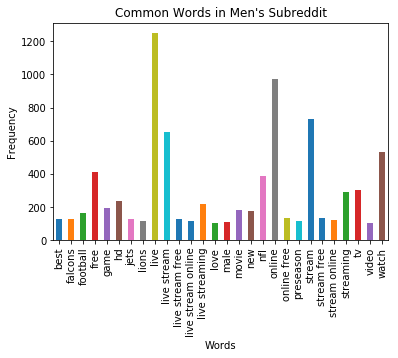

<Figure size 432x288 with 0 Axes>

In [29]:
#Graph top words for MEN
X_0 = df_reddit[df_reddit['subreddit']=='men'] # specific subreddit
# X_0 = reddit_clean[0]
# vect = CountVectorizer(ngram_range=(1,2))

# vect=CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect=CountVectorizer(stop_words=stop_words, ngram_range=(1,5), max_features=100)
X_d = vect.fit_transform(X_0['title']) # vectorize
X_d_df = pd.DataFrame(X_d.toarray(), columns=vect.get_feature_names()) # create dataframe
# d_words = pd.DataFrame(X_d_df.sum()>= 290) # gives me top 5 most occurring words
d_words = pd.DataFrame(X_d_df.sum()> 100) 
d_word_lst = d_words[d_words[0]==True].index
X_d_df[d_word_lst].sum().plot(kind='bar');


plt.title("Common Words in Men's Subreddit")
# Set x-axis label
plt.xlabel('Words')
# Set y-axis label
plt.ylabel('Frequency')
plt.show()

plt.savefig('MenTopWords.pdf')

In [30]:

X_d_df[d_word_lst].sum()

best                   125
falcons                129
football               162
free                   409
game                   192
hd                     236
jets                   128
lions                  112
live                  1250
live stream            654
live stream free       128
live stream online     112
live streaming         217
love                   104
male                   111
movie                  179
new                    178
nfl                    384
online                 972
online free            133
preseason              117
stream                 730
stream free            133
stream online          121
streaming              292
tv                     302
video                  102
watch                  532
dtype: int64

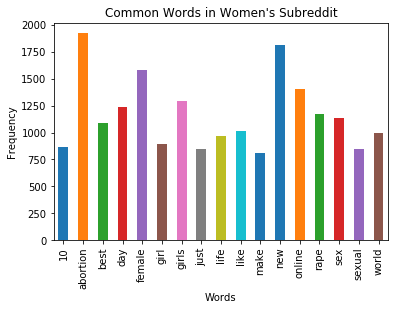

<Figure size 432x288 with 0 Axes>

In [31]:
#Graph top words for WOMEN
X_0 = df_reddit[df_reddit['subreddit']=='women'] # specific subreddit
# X_0 = reddit_clean[0]
# vect = CountVectorizer(ngram_range=(1,2))

# vect=CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect=CountVectorizer(stop_words=stop_words, ngram_range=(1,5), max_features=100)
X_d = vect.fit_transform(X_0['title']) # vectorize
X_d_df = pd.DataFrame(X_d.toarray(), columns=vect.get_feature_names()) # create dataframe
# d_words = pd.DataFrame(X_d_df.sum()>= 290) # gives me top 5 most occurring words
d_words = pd.DataFrame(X_d_df.sum()> 800) 
d_word_lst = d_words[d_words[0]==True].index
X_d_df[d_word_lst].sum().plot(kind='bar')

plt.title("Common Words in Women's Subreddit")
# Set x-axis label
plt.xlabel('Words')
# Set y-axis label
plt.ylabel('Frequency')
plt.show()

plt.savefig('WomenTopWords.pdf')

In [ ]:

X_d_df[d_word_lst].sum() 

In [ ]:
# df_women['y']
X = reddit_clean
y = df_reddit['sex_men']

In [ ]:
# Train test split data for countvect analysis

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)


In [ ]:
X_train_array = pd.DataFrame(X_train.toarray(), columns=vect.get_feature_names())
X_train_array.iloc[1].sort_values(0, ascending=False).head(20)
# X_train_array

In [ ]:
# X_train_array
X_train_array.sum().sort_values(0, ascending=False)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
#MATTHEW  - Gridsearch ROC_AUC score for unbalanced classes - uses accuracy as metric

#Bootstrapping

#undersample women's data - maybe not best


In [ ]:
##CODE FOR PLOTS
X_train_array.sum().sort_values(0, ascending=False)

In [ ]:
X_train_array.head().T

# COUNT VECTORIZER ANALYSES

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)
cvec1 = CountVectorizer(ngram_range=(1,2))  
cvec1.fit(X_train)
cvtrans1_text_train = cvec1.transform(X_train)
cvtrans1_text_test = cvec1.transform(X_test)

from sklearn.naive_bayes import MultinomialNB 
cv1_model = MultinomialNB().fit(cvtrans1_text_train,y_train)
print ('Predicted: ',cv1_model.predict(cvtrans1_text_train))

from sklearn.metrics import classification_report
all_predictions = cv1_model.predict(cvtrans1_text_train)
print (classification_report(y_train, all_predictions))

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)

In [ ]:
# # # Instantiate a CountVectorizer 
# vect = CountVectorizer(ngram_range=(2, 4))
# X_train = vect.fit_transform(X_train) 
# X_test = vect.transform(X_test) 
# X_train

In [ ]:
cvec1 = CountVectorizer(ngram_range=(1,2))  
cvec2 = CountVectorizer(ngram_range=(2,3))
cvec3 = CountVectorizer(ngram_range=(2,5))

In [ ]:
# Instantiate a CountVectorizer 1
cvec1.fit(X_train)
cvec1.transform(X_train)
cvec1.transform(X_test)
cvec1_df = pd.DataFrame(cvec1.get_feature_names())

In [ ]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
cvec1_df.columns = ['feature1'] 

In [ ]:
cvec1_df.head()

In [ ]:
cvec1_df['feature1'].value_counts().tail()

In [ ]:
cvec1.fit(X_train)
cvtrans1_text_train = cvec1.transform(X_train)
cvtrans1_text_test = cvec1.transform(X_test)

cv11_df = pd.DataFrame(cvtrans1_text_train.todense(), columns = cvec1.get_feature_names())

In [ ]:
cvec1_df['feature1'].value_counts().head(20)

In [ ]:
# # Instantiate Logistic Regression model as lr.
# lr = LogisticRegression()

# # Fit on training data. 
# lr.fit(X_train, y_train)
# # Score on training data - accuracy score - default score for classification
# lr.score(X_train, y_train)

# #predict
# lr.predict(X_test)
# y_hat = lr.predict(X_test)

# # Score on testing data. 
# lr.score(X_test, y_test)

# print('Intercept:', lr.intercept_)
# print('Coef(s):', lr.coef_)

# print('Logreg predicted subreddit:', lr.predict(X_test))
# print('Logreg predicted probabilities:', lr.predict_proba(X_test))

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)
cvec2 = CountVectorizer(ngram_range=(1,3))  
cvec2.fit(X_train)
cvtrans2_text_train = cvec2.transform(X_train)
cvtrans2_text_test = cvec2.transform(X_test)

from sklearn.naive_bayes import MultinomialNB 
cv2_model = MultinomialNB().fit(cvtrans2_text_train,y_train)
print ('Predicted: ',cv2_model.predict(cvtrans2_text_train))

from sklearn.metrics import classification_report
all_predictions = cv2_model.predict(cvtrans2_text_train)
print (classification_report(y_train, all_predictions))

In [ ]:
# Instantiate a CountVectorizer 2
cvec2.fit(X_train)
cvec2.transform(X_train)
cvec2.transform(X_test)
cvec2_df = pd.DataFrame(cvec2.get_feature_names())

In [ ]:
cvec2_df.columns = ['feature2']
cvec2_df.head()

In [ ]:
cvec2.fit(X_train)
cvtrans2_text_train = cvec2.transform(X_train)
cvtrans2_text_test = cvec2.transform(X_test)

In [ ]:
cvec2_df['feature2'].value_counts().tail()
cvec2_df = pd.DataFrame(cvtrans2_text_train.todense(), columns = cvec2.get_feature_names())
cvec2_df

In [ ]:
# Instantiate a CountVectorizer 1
cvec3.fit(X_train)
cvec3.transform(X_train)
cvec3.transform(X_test)
cvec3_df = pd.DataFrame(cvec3.get_feature_names())

In [ ]:
cvec3_df.columns = ['feature3']
cvec3_df.head()

In [ ]:
cvec3.fit(X_train)
cvtrans3_text_train = cvec3.transform(X_train)
cvtrans3_text_test = cvec3.transform(X_test)

In [ ]:
cvec3_df['feature3'].value_counts().tail()
cvec3_df = pd.DataFrame(cvtrans3_text_train.todense(), columns = cvec3.get_feature_names()) 

In [ ]:
cvec3_df

In [ ]:
#CODES BELOW INCLUDE EXTRA TESTS OF DIFFERENT NGRAMS AND FSCORES- BUT NOT FULL ANALYSIS

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)
cvec3 = CountVectorizer(ngram_range=(1,4))  
cvec3.fit(X_train)
cvtrans3_text_train = cvec3.transform(X_train)
cvtrans3_text_test = cvec3.transform(X_test)

from sklearn.naive_bayes import MultinomialNB 
cv3_model = MultinomialNB().fit(cvtrans3_text_train,y_train)
print ('Predicted: ',cv3_model.predict(cvtrans3_text_train))

from sklearn.metrics import classification_report
all_predictions = cv3_model.predict(cvtrans3_text_train)
print (classification_report(y_train, all_predictions))

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)
cvec3 = CountVectorizer(ngram_range=(2,3))  
cvec3.fit(X_train)
cvtrans3_text_train = cvec3.transform(X_train)
cvtrans3_text_test = cvec3.transform(X_test)

from sklearn.naive_bayes import MultinomialNB 
cv3_model = MultinomialNB().fit(cvtrans3_text_train,y_train)
print ('Predicted: ',cv3_model.predict(cvtrans3_text_train))

from sklearn.metrics import classification_report
all_predictions = cv3_model.predict(cvtrans3_text_train)
print (classification_report(y_train, all_predictions))

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)
cvec3 = CountVectorizer(ngram_range=(2,4))  
cvec3.fit(X_train)
cvtrans3_text_train = cvec3.transform(X_train)
cvtrans3_text_test = cvec3.transform(X_test)

from sklearn.naive_bayes import MultinomialNB 
cv3_model = MultinomialNB().fit(cvtrans3_text_train,y_train)
print ('Predicted: ',cv3_model.predict(cvtrans3_text_train))

from sklearn.metrics import classification_report
all_predictions = cv3_model.predict(cvtrans3_text_train)
print (classification_report(y_train, all_predictions))

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)
cvec3 = CountVectorizer(ngram_range=(2,5))  
cvec3.fit(X_train)
cvtrans3_text_train = cvec3.transform(X_train)
cvtrans3_text_test = cvec3.transform(X_test)

from sklearn.naive_bayes import MultinomialNB 
cv3_model = MultinomialNB().fit(cvtrans3_text_train,y_train)
print ('Predicted: ',cv3_model.predict(cvtrans3_text_train))

from sklearn.metrics import classification_report
all_predictions = cv3_model.predict(cvtrans3_text_train)
print (classification_report(y_train, all_predictions))

# TF-IDF ANALYSES

In [ ]:
# Why Use TF-IDF?
# Common words are penalized.
# Rare words have more influence.

# define X and y
X = reddit_clean
y = df_reddit['sex_men']

In [ ]:
# Train test split data for TFIDF vect analysis - REDUNDANT???
X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)

In [ ]:
# Initiate  TfidfVectorizer() with ngrams 2, 5, 10
tfidf1 = TfidfVectorizer(stop_words='english', ngram_range=(1,2))  
tfidf2 = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
tfidf3 = TfidfVectorizer(stop_words='english', ngram_range=(1,4))
tfidf4 = TfidfVectorizer(stop_words='english', ngram_range=(2,3))
tfidf5 = TfidfVectorizer(stop_words='english', ngram_range=(2,4))

In [ ]:
tfidf1.fit(X_train)
tfidf1.transform(X_train)
tfidf1.transform(X_test)

In [ ]:
tfidf1_df = pd.DataFrame(tfidf1.get_feature_names())
tfidf1_df.columns = ['feature1']
tfidf1_df['feature1'].value_counts().head()

tfidf1_df.head()

In [ ]:
# tfidf1_df

In [ ]:
tfidf1_xtrain_df = pd.DataFrame(trans1_X_train.todense(), columns = tfidf1.get_feature_names()) 
tfidf1_xtest_df = pd.DataFrame(trans1_X_test.todense(), columns = tfidf1.get_feature_names())

In [ ]:
trans1_X_test.shape

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y) 

tfidf1 = TfidfVectorizer(stop_words='english', ngram_range=(1,2))  
trans1_X_train = tfidf1.fit_transform(X_train)
trans1_X_test = tfidf1.transform(X_test)
 
tf1_model = MultinomialNB().fit(trans1_X_train,y_train) 
print ('Predicted: ',tf1_model.predict(trans1_X_train))
 
all_predictions = tf1_model.predict(trans1_X_train)
print (classification_report(y_train, all_predictions))

In [ ]:
tfidf2.fit_transform(X_train)
tfidf2.transform(X_test)

In [ ]:
tfidf2_df = pd.DataFrame(tfidf2.get_feature_names())
tfidf2_df.columns = ['feature2']
tfidf2_df['feature2'].value_counts().head()

In [ ]:
tfidf2_df.tail()

In [ ]:
trans2_X_train = tfidf2.fit_transform(X_train)
trans2_X_test = tfidf2.transform(X_test)


In [ ]:
tfidf2_df

In [ ]:
tfidf2_xtrain_df = pd.DataFrame(trans2_X_train.todense(), columns = tfidf2.get_feature_names())
tfidf2_xtest_df = pd.DataFrame(trans2_X_test.todense(), columns = tfidf2.get_feature_names())

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y) 

tfidf2 = TfidfVectorizer(stop_words='english', ngram_range=(1,3))  
trans2_X_train = tfidf2.fit_transform(X_train)
trans2_X_test = tfidf2.transform(X_test)
 
tf2_model = MultinomialNB().fit(trans2_X_train,y_train) 
print ('Predicted: ',tf2_model.predict(trans2_X_train))
 
all_predictions = tf2_model.predict(trans2_X_train)
print (classification_report(y_train, all_predictions))

In [ ]:
tfidf3.fit_transform(X_train)
tfidf3.transform(X_test)
# tfidf = TfidfVectorizer(vocabulary = myvocabulary, ngram_range = (1,3))
# tfs = tfidf.fit_transform(corpus.values())

In [ ]:
tfidf3_df = pd.DataFrame(tfidf3.get_feature_names())
tfidf3_df.columns = ['feature3']
tfidf3_df['feature3'].value_counts().head()

In [ ]:
tfidf3_df.head()

In [ ]:
trans3_X_train = tfidf3.fit_transform(X_train)
trans3_X_test = tfidf3.transform(X_test)


In [ ]:
tfidf3_df

In [ ]:
tfidf3_Xtrain_df = pd.DataFrame(trans3_X_train.todense(), columns = tfidf3.get_feature_names())
tfidf3_Xtrain_df = pd.DataFrame(trans3_X_train.todense(), columns = tfidf3.get_feature_names())

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y) 

tfidf3 = TfidfVectorizer(stop_words='english', ngram_range=(1,4))  
trans3_X_train = tfidf3.fit_transform(X_train)
trans3_X_test = tfidf3.transform(X_test)
 
tf3_model = MultinomialNB().fit(trans3_X_train,y_train) 
print ('Predicted: ',tf3_model.predict(trans3_X_train))
 
all_predictions = tf3_model.predict(trans3_X_train)
print (classification_report(y_train, all_predictions))

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y) 

tfidf3 = TfidfVectorizer(stop_words='english', ngram_range=(2,3))  
trans3_X_train = tfidf3.fit_transform(X_train)
trans3_X_test = tfidf3.transform(X_test)
 
tf3_model = MultinomialNB().fit(trans3_X_train,y_train) 
print ('Predicted: ',tf3_model.predict(trans3_X_train))
 
all_predictions = tf3_model.predict(trans3_X_train)
print (classification_report(y_train, all_predictions))

In [ ]:
# define X and y
X = reddit_clean
y = df_reddit['sex_men']

X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y) 

tfidf3 = TfidfVectorizer(stop_words='english', ngram_range=(2,4))  
trans3_X_train = tfidf3.fit_transform(X_train)
trans3_X_test = tfidf3.transform(X_test)
 
tf3_model = MultinomialNB().fit(trans3_X_train,y_train) 
print ('Predicted: ',tf3_model.predict(trans3_X_train))
 
all_predictions = tf3_model.predict(trans3_X_train)
print (classification_report(y_train, all_predictions))

In [ ]:
# vocab = vect.get_feature_names()
# print(vocab)

# SUPPORT VECTOR MACHINE

In [ ]:
# df_women['y']
X = reddit_clean
y = df_reddit['sex_men']

In [ ]:
# Train test split data for Support vect machine analysis - REDUNDANT???
X_train, X_test, y_train, y_test = train_test_split(X,  
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=88,
                                                    stratify=y)

In [ ]:
# #online example
# cv = CountVectorizer()
# cv.fit(data)
# print len(cv.vocabulary_)
# print cv.get_feature_names()
# X_train = cv.transform(data)

# svm = LinearSVC()
# svm.fit(X_train, target)
# plot_coefficients(svm, cv.get_feature_names())

In [ ]:
vect = CountVectorizer(ngram_range=(2,3))   

X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)
# X = vect.fit_transform(reddit_clean).toarray()

In [ ]:
# Instantiate support vector machine. 

svc = svm.SVC(C = 100, 
              kernel='rbf', 
              gamma = 0.0001)

# Fit support vector machine to training data. 
svc.fit(X_train, y_train)

In [ ]:

# y_pred_train = svc.predict(X_train)
# accuracy_score(X_train, y_train)


y_pred_train = svc.predict(X_train)
accuracy_score(y_train, y_pred_train)

In [ ]:
# svc.fit(X_train, y_train)
 
# # Generate predictions.
y_pred = svc.predict(X_test)
 

# Measure performance based on accuracy.
accuracy_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame(svc.predict(X_test), columns = ['predicted_svc'])
results['true'] = y_test


results.head(10)

In [ ]:
from sklearn.metrics import roc_auc_score
# train classifier
# clf = SVC(probability=True, kernel='rbf')


svc = svm.SVC(C = 100, 
              probability=True, 
              kernel='rbf', 
              gamma = 0.0001)

# Fit support vector machine to training data. 
svc.fit(X_train, y_train)


# predict and evaluate predictions
predictions = svc.predict_proba(X_test)
print('ROC-AUC yields ' + str(roc_auc_score(y_test, predictions[:,1])))

In [38]:
X = reddit_clean
y = df_reddit['sex_men']

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=88, 
                                                    stratify=y)

In [40]:
vect = CountVectorizer(ngram_range=(1,2))   
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

# X_train = vect.fit_transform(X_train).toarray()

In [41]:
#instantiate random forest /extra trees
#params = [{'n_estimators': 10,
           #'criterion':['gini','entropy'], 
           #'max_depth':[5, 10, 20], 
           #'warm_start':'True'}]
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [42]:
# Model Evaluation
cross_val_score(rf, X_train, y_train, cv=3).mean()

0.9485837146919504

In [43]:
cross_val_score(et, X_train, y_train).mean()


0.9429422738530023

In [36]:
rf.fit(X_train, y_train)
rf.predict(X_test)

# rf.predict(vect.transform(X_test).toarray())

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
# #cross val score for model using tfidf - 3 - CHECK THIS!  MIGHT BE BETTER TO USE SOMETHING ELSE
# rf_cval = cross_val_score(rf, trans_text_train, y_train, n_jobs=-1)

# print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

In [ ]:
np.random.choice(X_train, size=3, replace=False)  #will choose the 3 with biggest ??

In [ ]:
np.random.choice(X_train, size=3, replace=False)  #will choose the 3 with biggest ??

In [ ]:
np.random.choice(X_train, size=3, replace=False)  #will choose the 3 with biggest ??

In [44]:
# https://scikit-plot.readthedocs.io/en/stable/Quickstart.html
from sklearn.model_selection import cross_val_predict
# random_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=88)

# random_forest_clf = RandomForestClassifier()
# predictions = cross_val_predict(rf, X_test, y_test)
# predictions1 = cross_val_predict(rf, X_train, y_train)

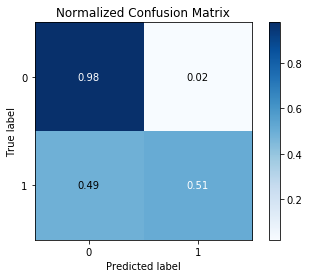

In [45]:
# https://scikit-plot.readthedocs.io/en/stable/metrics.html
import scikitplot as skplt
rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True) 
plt.show()
#confusion matrix

In [46]:
  #COPIED FROM ABOVE  - NEED TO MODIFY FOR RF
# from sklearn.naive_bayes import MultinomialNB 
# rf = MultinomialNB().fit(cvtrans1_text_train,y_train)

# print ('Predicted: ',rf.predict(X_test))
 
from sklearn.metrics import classification_report 
all_predictions = rf.predict(X_train) 
print (classification_report(y_train, all_predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38787
           1       0.99      0.92      0.96      3223

   micro avg       0.99      0.99      0.99     42010
   macro avg       0.99      0.96      0.98     42010
weighted avg       0.99      0.99      0.99     42010



In [47]:

predictions = cross_val_predict(rf, X_test, y_test)
predictions1 = cross_val_predict(rf, X_train, y_train)

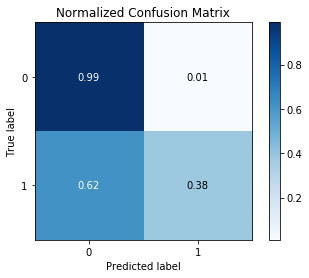

In [50]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True) 
# # plt.show()

# skplt.metrics.plot_confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1), normalize=True)

# skplt.metrics.plot_confusion_matrix(y_train.values.argmax(axis=1), predictions1.argmax(axis=1), normalize=True)
# # plt.show()

In [51]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [52]:
grid = {
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'n_estimators': n_estimators,
              'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [10, 20, 30],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2,3,4]
}
gs = GridSearchCV(rf, param_grid=rf_params)
gs.fit(X_train, y_train) 

In [ ]:
gs.best_score_
gs.best_params_
best_gs = gs.best_estimator_
best_gs.score(X_test, y_test)

print("gs.best_score: ", gs.best_score_)
print("gs.best_params: " , gs.best_params_)
print("best_gs =",  gs.best_estimator_)
print("best_gs.score: " , best_gs.score(X_test, y_test))


In [55]:
# rf_grid = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, verbose=2, n_jobs = -1)


In [57]:
# rf_grid = rf_grid.fit(X_train, y_train)
#

In [ ]:
rf_grid.best_score_
rf_grid.best_params_
best_rf = rf_grid.best_estimator_
best_rf.score(X_test, y_test)

In [ ]:
print("rf_grid.best_score: ", rf_grid.best_score_)
print("rf_grid.best_params: " , rf_grid.best_params_)
print("best_rf =",  rf_grid.best_estimator_)
print("best_rf.score: " , best_rf.score(X_test, y_test))

In [ ]:
# #will choose the 3 with biggest ??
# #can rerun multiple times and get diff vars
# import numpy as np

# np.random.choice(df['title'], size=3, replace=False)  

In [ ]:
# Model Evaluation
cross_val_score(rf, X_train, y_train, cv=3).mean()

In [ ]:
# Grid Search
rf_params = {}
gs = GridSearchCV(rf, param_grid=rf_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)

In [ ]:
rf = RandomForestClassifier(random_state=88)
rf_params = {
    'n_estimators':[43,45,47],
    'max_depth': [None, 2,3,4]
} 
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_
# https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py
best_parameters = gs.best_estimator_.get_params()

In [ ]:
gs.predict(test[features])

In [ ]:
predictions = gs.predict(test[features])

In [ ]:
# http://sdsawtelle.github.io/blog/output/spam-classification-part2-vectorization-and-svm-pipeline.html
# print("Best parameter values:")
# for param in search.best_params_.items():
#     print(param)

# print("CV Score using best parameter values:", search.best_score_)

In [ ]:
#value counts normalize gives baseline accuracy if y= dummy var
y.value_counts(normalize=True)

In [ ]:
y.value_counts(normalize=True).values[0:1] #above 61% is great.  below 61% is really bad, below null/baseline model

In [ ]:
# https://www.kaggle.com/hsrobo/tf-idf-svm-baseline
# convert to feature vector
feature_extraction = TfidfVectorizer()
X = feature_extraction.fit_transform(df_reddit['title'].values)

# split into training- and test set
TRAINING_END = date(2014,12,31)
num_training = len(data[pandas.to_datetime(data["Date"]) <= TRAINING_END])
X_train = X[:num_training]
X_test = X[num_training:]
y_train = data["Label"].values[:num_training]
y_test = data["Label"].values[num_training:]

# train classifier
clf = SVC(probability=True, kernel='rbf')
clf.fit(X_train, y_train)

# predict and evaluate predictions
predictions = clf.predict_proba(X_test)
print('ROC-AUC yields ' + str(roc_auc_score(y_test, predictions[:,1])))